# Import Libraries

In [1]:
# Install necessary packages
!pip install calmap duckdb sweetviz pygwalker xgboost pydot visualkeras graphviz lifelines pyarrow feather-format

    1. !pip install calmap: This line installs the calmap package. calmap is a Python library used for visualizing calendar heatmaps, which can be helpful for analyzing time-based data.

    2. !pip install duckdb: This line installs the duckdb package. duckdb is an in-memory analytical database engine that provides fast query execution and analysis capabilities.

    3. !pip install sweetviz: This line installs the sweetviz package. sweetviz is a Python library for visualizing and analyzing datasets. It generates detailed visual and statistical summaries of datasets, including distribution plots, correlation matrices, and more.

    4. !pip install pygwalker: This line installs the pygwalker package. pygwalker is a Python library for simulating and analyzing random walks and Markov chains.

These packages are being installed using the pip package manager, which is used to install and manage Python packages and dependencies.

By installing these packages, you'll have access to additional functionality and tools for data analysis, visualization, and simulation in your project.

In [2]:
# Basic libraries
import numpy as np
from numpy import inf
import pandas as pd
import warnings
from datetime import datetime

# Machine Learning libraries
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression, Ridge
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, fbeta_score, mean_squared_error, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RepeatedStratifiedKFold, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score,recall_score

# Imbalanced data handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import calmap

# Other libraries
import requests
import tabulate
from scipy import stats
from scipy.stats import norm
import duckdb
import time
colors = ['#66b3ff', '#ff9999']

# Plotly offline mode
pyo.init_notebook_mode(connected=True)

# Set the warning filter to ignore
warnings.filterwarnings("ignore")

# Set the display options
pd.options.display.max_columns = None

# Set the color palette
sns.set_palette(sns.color_palette())

# Set a random seed at the beginning of your script
np.random.seed(42)


In [3]:
# %pip install lifelines

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, RFE, SelectPercentile
from sklearn.compose import ColumnTransformer
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV
import matplotlib.patches as mpatches
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from scipy.stats import chi2
from sklearn.metrics import silhouette_score


# Explore The Data 

Reads a CSV file into a pandas DataFrame.

In [5]:
# Reads a CSV file into a pandas DataFrame
dataframe = pd.read_csv("C:\\Users\\lekho\\Work\\FraudDetection\\Data\\data_26.csv")
datalock = pd.read_csv("C:\\Users\\lekho\\OneDrive\Máy tính\\fizo-it-team\\Score Ver 4.0\\lock_user.csv")
fpd_accum = pd.read_csv("C:\\Users\\lekho\\OneDrive\Máy tính\\fizo-it-team\\Score Ver 4.0\\fpd_accum.csv")
# Generating the dataframe
df = pd.DataFrame(dataframe)
df_lock = pd.DataFrame(datalock)
fpd_accum = pd.DataFrame(fpd_accum)


_Check NA_

In [6]:
# Glimpse NA % df
data_df = df
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,velocity_60d,velocity_28d,velocity_14d,velocity_7d,velocity_3d,mean_distance_sellOrg7d,mean_distance_sellOrg14d,mean_distance_sellOrg28d,region_tier,MONTH,refphone_cnt_7d,refphone_cnt_3d,idcard_cnt_28d,idcard_cnt_14d,idcard_cnt_7d,idcard_cnt_3d,refphone_cnt_28d,male_cnt_28d,male_cnt_14d,male_cnt_7d,male_cnt_3d,nonViettel_cnt_28d,nonViettel_cnt_14d,nonViettel_cnt_7d,nonViettel_cnt_3d,amt30_cnt_27d,amt30_cnt_14d,amt30_cnt_7d,refphone_cnt_14d,app_cnt_7d,app_cnt_1d,app_cnt_3d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,acceleration_60d,acceleration_28d,acceleration_14d,acceleration_7d,BAD_lock,approve_cnt_28d,approve_cnt_14d,approve_cnt_7d,approve_cnt_3d,acceleration_3d,app_cnt_60d,app_cnt_28d,app_cnt_14d,Single_cnt_28d,amt30_cnt_3d,Single_cnt_7d,Single_cnt_14d,outSideAppPermanent_cnt_14d,phoneTrigger_cnt_14d,phoneTrigger_cnt_7d,idTrigger_cnt_28d,idTrigger_cnt_14d,idTrigger_cnt_7d,term_permanent_flag_cnt_28d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_7d,outSideAppPermanent_cnt_28d,outSideAppPermanent_cnt_7d,userTriggerNew_cnt_7d,outSideApp_cnt_28d,outSideApp_cnt_14d,outSideApp_cnt_7d,stable_and_self_employed_rate_cnt_28d,stable_and_self_employed_rate_cnt_14d,stable_and_self_employed_rate_cnt_7d,stable_and_self_employed_rate_cnt_3d,vnpostUserName,vnpostProvinceName,phoneTrigger_cnt_28d,userTriggerNew_cnt_14d,loan_date,distance_sellerOrg_locationCreate_km_cnt_14d,Single_cnt_3d,idcard_rej_cnt_28d,idcard_rej_cnt_14d,idcard_rej_cnt_7d,idcard_rej_cnt_3d,distance_sellerProvince_locationCreate_km_28d,distance_sellerProvince_locationCreate_km_14d,distance_sellerProvince_locationCreate_km_7d,distance_sellerOrg_locationCreate_km_cnt_28d,distance_sellerOrg_locationCreate_km_cnt_7d,userTriggerNew_cnt_28d,addressTrigger_cnt_28d,addressTrigger_cnt_14d,addressTrigger_cnt_7d,emailTrigger_cnt_28d,emailTrigger_cnt_14d,emailTrigger_cnt_7d,createTimeTrigger_cnt_28d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_7d,avg_distance_sellerProvince_locationCreate_km_28d
Total,90317.000000,72019.000000,67321.000000,65664.000000,64188.000000,59997.000000,52650.00000,48011.000000,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,88.829986,70.833251,66.212601,64.582883,63.131184,59.009186,51.78315,47.220528,0.024588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Glimpse NA % datalock
data_df = datalock
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,lock_date,UserName,lock_time
Total,0.0,0.0,0.0
Percent,0.0,0.0,0.0


In [8]:
# Glimpse NA % fpd_accum
data_df = fpd_accum
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,vnpostUserName,day,cumulative_app,cumulative_fpd,cumulative_fpd_rate
Total,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0


## Merge data

In [9]:
# Display the first row of df with a descriptive header
df.head(1)

,MONTH,loan_date,vnpostProvinceName,region_tier,vnpostUserName,stable_and_self_employed_rate_cnt_3d,stable_and_self_employed_rate_cnt_7d,stable_and_self_employed_rate_cnt_14d,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg7d,mean_distance_sellOrg14d,mean_distance_sellOrg28d,distance_sellerOrg_locationCreate_km_cnt_7d,distance_sellerOrg_locationCreate_km_cnt_14d,distance_sellerOrg_locationCreate_km_cnt_28d,distance_sellerProvince_locationCreate_km_7d,distance_sellerProvince_locationCreate_km_14d,distance_sellerProvince_locationCreate_km_28d,idcard_rej_cnt_3d,idcard_rej_cnt_7d,idcard_rej_cnt_14d,idcard_rej_cnt_28d,Single_cnt_3d,Single_cnt_7d,Single_cnt_14d,Single_cnt_28d,amt30_cnt_3d,amt30_cnt_7d,amt30_cnt_14d,amt30_cnt_27d,nonViettel_cnt_3d,nonViettel_cnt_7d,nonViettel_cnt_14d,nonViettel_cnt_28d,male_cnt_3d,male_cnt_7d,male_cnt_14d,male_cnt_28d,idcard_cnt_3d,idcard_cnt_7d,idcard_cnt_14d,idcard_cnt_28d,refphone_cnt_3d,refphone_cnt_7d,refphone_cnt_14d,refphone_cnt_28d,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,velocity_3d,acceleration_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,approve_cnt_3d,approve_cnt_7d,approve_cnt_14d,approve_cnt_28d,BAD_lock,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d
0,2023-01,2023-01-13T00:00:00Z,Bưu điện Tỉnh Bình Định,TIER_3,yenbt,1,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4,4,1,1,2,2,0,0,0,0,0,0,0,0,0,0,1,1,1,1,5,5,1,1,4,4,0,1,1,5,5,5,NaN,-0.333333,NaN,NaN,NaN,NaN,1,1,1,1,0,-0.142857,-0.357143,-0.178571,-0.083333,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Display the first row of df_lock with a descriptive header
df_lock.head(1)

,lock_date,UserName,lock_time
0,2023-07-01T00:00:00Z,0344767838,1


In [11]:
fpd_accum.head(1)

,vnpostUserName,day,cumulative_app,cumulative_fpd,cumulative_fpd_rate
0,00099806,2022-10-05T00:00:00Z,0,0,0.0


### Map the Lock dataframe with the performance dataframe

In [12]:
df = df.drop(['vnpostProvinceName'], axis=1)

In [13]:
# Step 1: Convert columns to datetime
df['loan_date'] = pd.to_datetime(df['loan_date'])
df_lock['lock_date'] = pd.to_datetime(df_lock['lock_date'])
fpd_accum['day'] = pd.to_datetime(fpd_accum['day'])

# Prepare for the customized left join
result_rows = []

# Step 2: Iterate through each row in the 'df' dataframe
for _, row in df.iterrows():
    start_date = row['loan_date'] - pd.Timedelta(days=30)
    end_date = row['loan_date'] + pd.Timedelta(days=30)

    mask = (
        (df_lock['lock_date'] >= start_date) & 
        (df_lock['lock_date'] <= end_date) & 
        (df_lock['UserName'] == row['vnpostUserName'])
    )
    filtered_df_lock = df_lock.loc[mask]

    # If there are matches, we combine the data
    if not filtered_df_lock.empty:
        for _, matched_row in filtered_df_lock.iterrows():
            combined_data = row.combine_first(matched_row)
            result_rows.append(combined_data)
    else:
        # No match, keep the original row
        result_rows.append(row)

# Step 3: Create the combined dataframe
result_df = pd.DataFrame(result_rows)

# Step 4: Create the 'BAD' column based on 'lock_time' and FPD conditions
# Here, we include additional conditions for marking 'BAD'
def check_bad_conditions(row):
    # Conditions related to 'lock_time'
    lock_time_condition = row['lock_time'] > 0 if row['lock_time'] is not None else False
    
    # Conditions related to FPD (First Payment Default)
    fpd_conditions = [
    ]

    # If any of the conditions are met, mark as 'BAD'
    return 1 if lock_time_condition or any(fpd_conditions) else 0

result_df['BAD'] = result_df.apply(check_bad_conditions, axis=1)

# Optional: If you wish to remove certain columns like 'lock_date' and 'UserName', you can do so.
final_df = result_df.drop(['lock_date', 'UserName'], axis=1)

# Now, 'final_df' is your final dataframe with the 'BAD' column indicating 1 if any conditions are met.
df = final_df

In [14]:
fpd_accum.rename(columns={'day': 'loan_date'}, inplace=True)

In [15]:
merged_df = pd.merge(final_df, fpd_accum, on=['vnpostUserName', 'loan_date'], how='left')

In [16]:
merged_df['loan_date'] = pd.to_datetime(merged_df['loan_date']).dt.strftime('%d-%m-%Y')

In [17]:
merged_df.head(1)

,MONTH,loan_date,region_tier,vnpostUserName,stable_and_self_employed_rate_cnt_3d,stable_and_self_employed_rate_cnt_7d,stable_and_self_employed_rate_cnt_14d,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg7d,mean_distance_sellOrg14d,mean_distance_sellOrg28d,distance_sellerOrg_locationCreate_km_cnt_7d,distance_sellerOrg_locationCreate_km_cnt_14d,distance_sellerOrg_locationCreate_km_cnt_28d,distance_sellerProvince_locationCreate_km_7d,distance_sellerProvince_locationCreate_km_14d,distance_sellerProvince_locationCreate_km_28d,idcard_rej_cnt_3d,idcard_rej_cnt_7d,idcard_rej_cnt_14d,idcard_rej_cnt_28d,Single_cnt_3d,Single_cnt_7d,Single_cnt_14d,Single_cnt_28d,amt30_cnt_3d,amt30_cnt_7d,amt30_cnt_14d,amt30_cnt_27d,nonViettel_cnt_3d,nonViettel_cnt_7d,nonViettel_cnt_14d,nonViettel_cnt_28d,male_cnt_3d,male_cnt_7d,male_cnt_14d,male_cnt_28d,idcard_cnt_3d,idcard_cnt_7d,idcard_cnt_14d,idcard_cnt_28d,refphone_cnt_3d,refphone_cnt_7d,refphone_cnt_14d,refphone_cnt_28d,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,velocity_3d,acceleration_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,approve_cnt_3d,approve_cnt_7d,approve_cnt_14d,approve_cnt_28d,BAD_lock,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,lock_time,BAD,cumulative_app,cumulative_fpd,cumulative_fpd_rate
0,2023-01,13-01-2023,TIER_3,yenbt,1,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4,4,1,1,2,2,0,0,0,0,0,0,0,0,0,0,1,1,1,1,5,5,1,1,4,4,0,1,1,5,5,5,NaN,-0.333333,NaN,NaN,NaN,NaN,1,1,1,1,0,-0.142857,-0.357143,-0.178571,-0.083333,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,1.0,0.0,0.0


### Define 'BAD'

In [18]:
def set_bad_flag(row):
    # Existing condition related to 'lock_time'.
    lock_time_condition = row['lock_time'] > 0 if 'lock_time' in row and row['lock_time'] is not None else False
    
    # New condition based on 'cumulative_fpd_rate'.
    fpd_rate_condition = row['cumulative_fpd_rate'] >= 5 if 'cumulative_fpd_rate' in row and row['cumulative_fpd_rate'] is not None else False

    # If any of the conditions are met, the entry is "BAD".
    return 1 if lock_time_condition or fpd_rate_condition else 0

In [19]:
# Apply the function to each row in 'merged_df'
merged_df['BAD'] = merged_df.apply(set_bad_flag, axis=1)

In [20]:
df = merged_df
df.head()

,MONTH,loan_date,region_tier,vnpostUserName,stable_and_self_employed_rate_cnt_3d,stable_and_self_employed_rate_cnt_7d,stable_and_self_employed_rate_cnt_14d,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg7d,mean_distance_sellOrg14d,mean_distance_sellOrg28d,distance_sellerOrg_locationCreate_km_cnt_7d,distance_sellerOrg_locationCreate_km_cnt_14d,distance_sellerOrg_locationCreate_km_cnt_28d,distance_sellerProvince_locationCreate_km_7d,distance_sellerProvince_locationCreate_km_14d,distance_sellerProvince_locationCreate_km_28d,idcard_rej_cnt_3d,idcard_rej_cnt_7d,idcard_rej_cnt_14d,idcard_rej_cnt_28d,Single_cnt_3d,Single_cnt_7d,Single_cnt_14d,Single_cnt_28d,amt30_cnt_3d,amt30_cnt_7d,amt30_cnt_14d,amt30_cnt_27d,nonViettel_cnt_3d,nonViettel_cnt_7d,nonViettel_cnt_14d,nonViettel_cnt_28d,male_cnt_3d,male_cnt_7d,male_cnt_14d,male_cnt_28d,idcard_cnt_3d,idcard_cnt_7d,idcard_cnt_14d,idcard_cnt_28d,refphone_cnt_3d,refphone_cnt_7d,refphone_cnt_14d,refphone_cnt_28d,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,velocity_3d,acceleration_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,approve_cnt_3d,approve_cnt_7d,approve_cnt_14d,approve_cnt_28d,BAD_lock,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,lock_time,BAD,cumulative_app,cumulative_fpd,cumulative_fpd_rate
0,2023-01,13-01-2023,TIER_3,yenbt,1,1,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4,4,1,1,2,2,0,0,0,0,0,0,0,0,0,0,1,1,1,1,5,5,1,1,4,4,0,1,1,5,5,5,NaN,-0.333333,NaN,NaN,NaN,NaN,1,1,1,1,0,-0.142857,-0.357143,-0.178571,-0.083333,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0,1.0,0.0,0.0
1,2023-07,07-07-2023,TIER_3,95.0434,0,0,0,0,1,2,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,3,8,1,1,1,1,0,0,0,1,2,2,4,4,1,1,3,7,2,2,5,11,2,2,5,11,2,2,2,5,11,11,2.0,0.000000,NaN,NaN,NaN,NaN,2,2,2,3,0,0.000000,-0.214286,-0.321429,-0.150000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0,7.0,0.0,0.0
2,2023-04,23-04-2023,TIER_3,41.0561,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.4,4.4,3.125,44.0,44.0,50.0,0.0,0.0,0.0,0,5,6,23,0,1,1,4,0,0,1,12,0,1,1,9,0,2,3,15,0,5,6,25,0,5,6,25,0,0,5,6,25,25,NaN,0.000000,0.0,NaN,0.0,NaN,0,0,0,1,0,-0.714286,-0.428571,-0.892857,-0.416667,0.862745,0.862745,0.980392,0.0,0.0,0.0,NaN,0,14.0,0.0,0.0
3,2023-10,24-10-2023,TIER_3,10.1682,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,2,0,1,1,3,0,1,1,3,0,0,1,1,3,3,NaN,0.000000,NaN,NaN,NaN,NaN,0,0,0,0,0,-0.142857,-0.071429,-0.107143,-0.050000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0,NaN,NaN,NaN
4,2023-05,26-05-2023,TIER_3,95.0580,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,4,4,4,5,1,1,1,1,0,0,0,0,3,3,3,4,4,4,4,4,4,4,4,5,4,4,4,5,2,4,4,4,5,5,2.0,-0.666667,2.0,NaN,NaN,NaN,0,0,0,0,0,-0.285714,-0.142857,-0.107143,-0.050000,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,0,3.0,0.0,0.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101674 entries, 0 to 101673
Columns: 104 entries, MONTH to cumulative_fpd_rate
dtypes: float64(29), int64(71), object(4)
memory usage: 81.4+ MB


In [22]:
# Create a list of FPD related columns to drop
fpd_cols_to_drop = [col for col in df.columns if 'FPD' in col]

# Drop those columns
df = df.drop(fpd_cols_to_drop, axis=1)

In [23]:
# Characteristic variable isolation
# Fill 0
spe_num = df.select_dtypes(['float', 'int']).columns
df[spe_num] = df[spe_num].apply(lambda x: x.fillna(0), axis=0)

# Fill missing values
spe_obj = df.select_dtypes(['object']).columns
df[spe_obj] = df[spe_obj].apply(lambda x: x.fillna('Null'), axis=0)

In [24]:
# df = df.drop(['cumulative_app',	'cumulative_fpd',	'cumulative_fpd_rate', 'lock_time'], axis=1)

In [25]:
cols_to_drop = df.filter(like='TIER').columns
df = df.drop(cols_to_drop, axis=1)

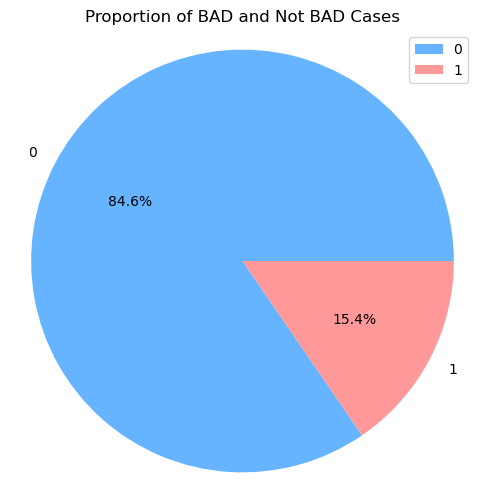

In [26]:
# Creating a copy
counts = df['BAD'].value_counts()
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.axis('equal')
plt.title('Proportion of BAD and Not BAD Cases')
plt.legend()
plt.show()

Scaling down distance

In [27]:
df.columns

Index(['MONTH', 'loan_date', 'region_tier', 'vnpostUserName',
       'stable_and_self_employed_rate_cnt_3d',
       'stable_and_self_employed_rate_cnt_7d',
       'stable_and_self_employed_rate_cnt_14d',
       'stable_and_self_employed_rate_cnt_28d', 'outSideApp_cnt_7d',
       'outSideApp_cnt_14d',
       ...
       'avg_distance_sellerOrg_locationCreate_km_cnt_14d',
       'avg_distance_sellerOrg_locationCreate_km_cnt_28d',
       'avg_distance_sellerProvince_locationCreate_km_7d',
       'avg_distance_sellerProvince_locationCreate_km_14d',
       'avg_distance_sellerProvince_locationCreate_km_28d', 'lock_time', 'BAD',
       'cumulative_app', 'cumulative_fpd', 'cumulative_fpd_rate'],
      dtype='object', length=104)

In [28]:
# Replace 0s with a small value if present to avoid log(0)
df['distance_sellerProvince_locationCreate_km_7d'] = df['distance_sellerProvince_locationCreate_km_7d'].replace(0, 0.0001)
df['distance_sellerProvince_locationCreate_km_7d'] = np.log(df['distance_sellerProvince_locationCreate_km_7d'])

In [29]:
df['distance_sellerProvince_locationCreate_km_7d'].head()

0   -9.21034
1   -9.21034
2   -9.21034
3   -9.21034
4   -9.21034
Name: distance_sellerProvince_locationCreate_km_7d, dtype: float64

In [30]:
# from sklearn.preprocessing import RobustScaler

numeric_cols = df.select_dtypes(include=['float', 'int']).columns

# scaler = RobustScaler()
# df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

loan_data = df
data = df

In [31]:
df.describe()

,stable_and_self_employed_rate_cnt_3d,stable_and_self_employed_rate_cnt_7d,stable_and_self_employed_rate_cnt_14d,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg7d,mean_distance_sellOrg14d,mean_distance_sellOrg28d,distance_sellerOrg_locationCreate_km_cnt_7d,distance_sellerOrg_locationCreate_km_cnt_14d,distance_sellerOrg_locationCreate_km_cnt_28d,distance_sellerProvince_locationCreate_km_7d,distance_sellerProvince_locationCreate_km_14d,distance_sellerProvince_locationCreate_km_28d,idcard_rej_cnt_3d,idcard_rej_cnt_7d,idcard_rej_cnt_14d,idcard_rej_cnt_28d,Single_cnt_3d,Single_cnt_7d,Single_cnt_14d,Single_cnt_28d,amt30_cnt_3d,amt30_cnt_7d,amt30_cnt_14d,amt30_cnt_27d,nonViettel_cnt_3d,nonViettel_cnt_7d,nonViettel_cnt_14d,nonViettel_cnt_28d,male_cnt_3d,male_cnt_7d,male_cnt_14d,male_cnt_28d,idcard_cnt_3d,idcard_cnt_7d,idcard_cnt_14d,idcard_cnt_28d,refphone_cnt_3d,refphone_cnt_7d,refphone_cnt_14d,refphone_cnt_28d,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,velocity_3d,acceleration_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,approve_cnt_3d,approve_cnt_7d,approve_cnt_14d,approve_cnt_28d,BAD_lock,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,lock_time,BAD,cumulative_app,cumulative_fpd,cumulative_fpd_rate
count,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.00000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000,101674.000000
mean,0.556848,1.131145,1.799300,3.102779,0.315400,0.524392,0.866534,0.948984,1.590584,2.578221,0.724462,1.217529,1.965153,0.035388,0.062897,0.110490,0.010986,0.019926,0.035388,0.050328,0.082115,0.127151,0.014694,0.022444,0.037492,0.408738,0.701281,1.183941,0.084761,0.140360,0.221335,2.320766,2.588050,2.741023,59.892667,100.492997,158.677902,-9.059986,56.572939,86.234426,1.531591,3.269253,5.747517,10.03522

# Time Factor

In [32]:
# Convert the date column to a datetime type if it isn't already
df['loan_date'] = pd.to_datetime(df['loan_date'])

# Extracting features
df['day_of_week'] = df['loan_date'].dt.dayofweek


# Temporal Analysis

In [33]:
# Sort by 'vnpostUserName' and 'loan_date'
df = df.sort_values(by=['vnpostUserName', 'loan_date'])

# Calculate the difference in days since the last activity
df['days_since_last_activity'] = df.groupby('vnpostUserName')['loan_date'].diff().dt.days

# Fill NaN values with some default value or 0 (since for the first record of each user, there won't be a previous activity)
df['days_since_last_activity'].fillna(0, inplace=True)

In [34]:
# Set the datetime column as the index if you want to perform time-series analysis
df.set_index('loan_date', inplace=True)

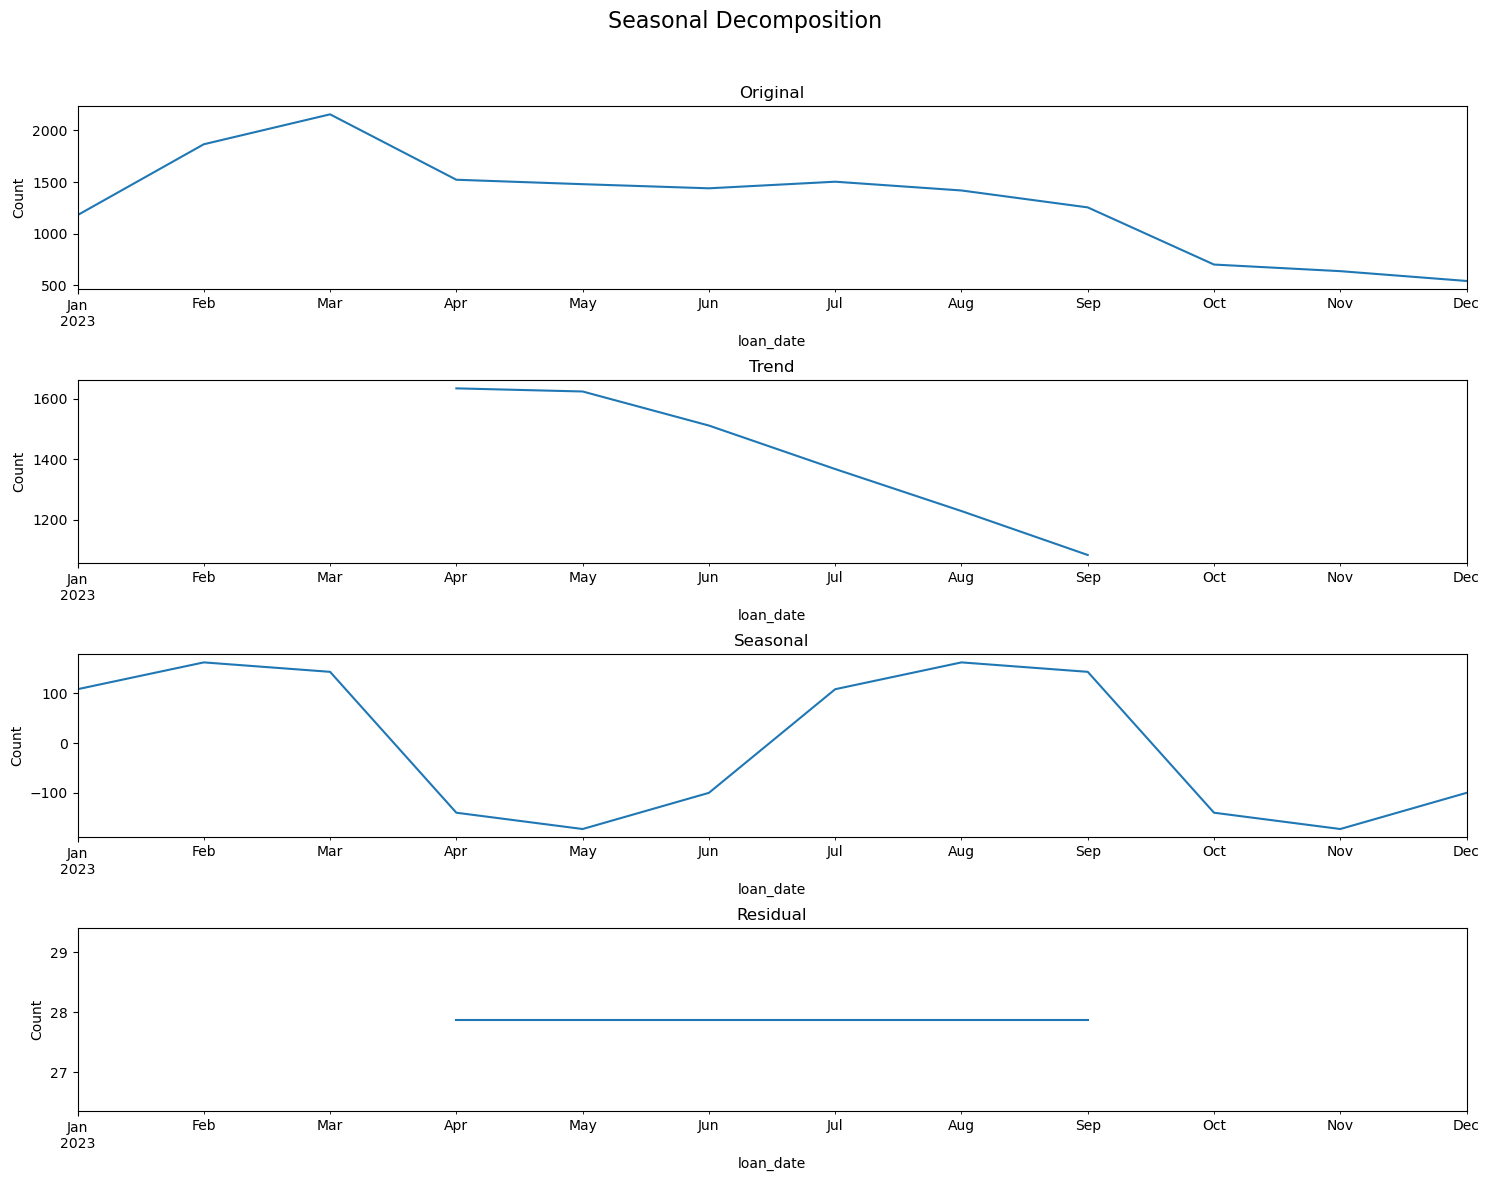

In [35]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ensure that 'df' has a DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    print("The DataFrame index must be a DatetimeIndex.")
    # If 'date' is your column with datetime, then set it as index
    # df.set_index('date', inplace=True)

# Check if the data contains any NaNs, as the decomposition function may not handle them well
if df['BAD'].isna().any():
    print("Warning: NaN values found. They will be filled or dropped.")
    # You can choose either to fill NaNs or drop them:
    # df['BAD'].fillna(method='ffill', inplace=True)  # forward-fill
    df.dropna(subset=['BAD'], inplace=True)  # or drop rows with NaNs

# Resample data to a regular period, summing 'BAD' counts for each month
y = df['BAD'].resample('M').sum()

# Check if we have enough data points after resampling
if len(y) < 12:
    print(f"Warning: Not enough data points for seasonal decomposition after resampling ({len(y)} points). Seasonal decomposition requires multiple complete cycles.")

# Perform seasonal decomposition
try:
    # Assuming a known seasonality period of 6 months
    decomposition = sm.tsa.seasonal_decompose(y, model='additive', period=6)

    # Plot the decomposed time series components
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
    fig.suptitle('Seasonal Decomposition', fontsize=16)

    # Plot the original data
    y.plot(ax=ax1, title='Original')
    ax1.set_ylabel('Count')

    # Plot the trend component
    decomposition.trend.plot(ax=ax2, title='Trend')
    ax2.set_ylabel('Count')

    # Plot the seasonal component
    decomposition.seasonal.plot(ax=ax3, title='Seasonal')
    ax3.set_ylabel('Count')

    # Plot the residual component
    decomposition.resid.plot(ax=ax4, title='Residual')
    ax4.set_ylabel('Count')

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

except ValueError as e:
    print(f"An error occurred during seasonal decomposition: {e}")


In [36]:
# This resets the index to the default integer index.
df = df.reset_index(drop=True)

In [37]:
df_1 = df
df.head()

,MONTH,region_tier,vnpostUserName,stable_and_self_employed_rate_cnt_3d,stable_and_self_employed_rate_cnt_7d,stable_and_self_employed_rate_cnt_14d,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg7d,mean_distance_sellOrg14d,mean_distance_sellOrg28d,distance_sellerOrg_locationCreate_km_cnt_7d,distance_sellerOrg_locationCreate_km_cnt_14d,distance_sellerOrg_locationCreate_km_cnt_28d,distance_sellerProvince_locationCreate_km_7d,distance_sellerProvince_locationCreate_km_14d,distance_sellerProvince_locationCreate_km_28d,idcard_rej_cnt_3d,idcard_rej_cnt_7d,idcard_rej_cnt_14d,idcard_rej_cnt_28d,Single_cnt_3d,Single_cnt_7d,Single_cnt_14d,Single_cnt_28d,amt30_cnt_3d,amt30_cnt_7d,amt30_cnt_14d,amt30_cnt_27d,nonViettel_cnt_3d,nonViettel_cnt_7d,nonViettel_cnt_14d,nonViettel_cnt_28d,male_cnt_3d,male_cnt_7d,male_cnt_14d,male_cnt_28d,idcard_cnt_3d,idcard_cnt_7d,idcard_cnt_14d,idcard_cnt_28d,refphone_cnt_3d,refphone_cnt_7d,refphone_cnt_14d,refphone_cnt_28d,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,velocity_3d,acceleration_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,approve_cnt_3d,approve_cnt_7d,approve_cnt_14d,approve_cnt_28d,BAD_lock,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,lock_time,BAD,cumulative_app,cumulative_fpd,cumulative_fpd_rate,day_of_week,days_since_last_activity
0,2023-02,TIER_1,00099806,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-9.21034,0.0,0.0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.000000,-0.071429,-0.035714,-0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,4,0.0
1,2023-02,TIER_1,00099806,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-9.21034,0.0,0.0,0,1,1,2,0,0,0,1,0,0,0,0,0,1,1,2,0,1,1,2,0,1,1,2,0,1,1,2,0,0,1,1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,-0.142857,-0.071429,-0.071429,-0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,3,6.0
2,2023-02,TIER_1,00099806,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-9.21034,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.000000,0.000000,-0.035714,-0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,3,7.0
3,2023-03,TIER_1,00099806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-9.21034,0.0,0.0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,2,0,0,0,2,0,0,0,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.000000,0.000000,-0.071429,-0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,1,19.0
4,2023-03,TIER_1,00099806,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-9.21034,0.0,0.0,0,1,1,2,0,1,1,2,0,0,0,0,0,1,1,2,0,0,0,1,0,1,1,2,0,1,1,2,0,0,1,1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,-0.142857,-0.071429,-0.071429,-0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5.0,0.0,0.0,1,7.0


In [38]:
# # Get a list of all column names
# all_columns = df_1.columns.tolist()

# # Columns to exclude
# exclude_columns = ["vnpostUserName", "BAD", "BAD_lock"]

# # Get the final list of columns by excluding the specified columns
# model_features = [col for col in all_columns if col not in exclude_columns]

# Clustering Algorithms

In [39]:
X = df.copy()
# Get list of numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(['object']).columns.tolist()

# Define the preprocessing pipeline for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the preprocessing pipeline for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessing column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize a dictionary to store the Silhouette scores
silhouette_scores = {}

# Import TruncatedSVD from scikit-learn
from sklearn.decomposition import TruncatedSVD

# Loop over different numbers of PCA components
for n_components in range(2, 4):
    # Perform TruncatedSVD on the preprocessed data, limiting to n_components
    svd = TruncatedSVD(n_components=n_components)
    X_svd = svd.fit_transform(preprocessor.fit_transform(X))

    # Fit the KMeans model on the SVD-transformed data
    kmeans = KMeans(n_clusters=2, random_state=42)
    cluster_labels = kmeans.fit_predict(X_svd)

    # Calculate the Silhouette score
    score = silhouette_score(X_svd, cluster_labels)

    # Store the Silhouette score in the dictionary
    silhouette_scores[n_components] = score

# Get the number of PCA components with the highest Silhouette score
best_n_components = max(silhouette_scores, key=silhouette_scores.get)

# Perform PCA on the preprocessed data, limiting to the optimal number of components
# pca = PCA(n_components=best_n_components, svd_solver='full')
pca = TruncatedSVD(n_components=best_n_components, random_state=42)
X_pca = pca.fit_transform(preprocessor.fit_transform(X))

# Fit the KMeans model on the PCA-transformed data
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Add the cluster labels to the subset dataframe
X_clusters = X.copy()
X_clusters['cluster_label'] = cluster_labels

# Add the PCA components to the subset dataframe
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(best_n_components)])
X_clusters = pd.concat([X_clusters, X_pca_df], axis=1)

X_clusters = X_clusters.dropna()

# Print the first few rows of the resulting dataframe
X_clusters.head(1)

,MONTH,region_tier,vnpostUserName,stable_and_self_employed_rate_cnt_3d,stable_and_self_employed_rate_cnt_7d,stable_and_self_employed_rate_cnt_14d,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg7d,mean_distance_sellOrg14d,mean_distance_sellOrg28d,distance_sellerOrg_locationCreate_km_cnt_7d,distance_sellerOrg_locationCreate_km_cnt_14d,distance_sellerOrg_locationCreate_km_cnt_28d,distance_sellerProvince_locationCreate_km_7d,distance_sellerProvince_locationCreate_km_14d,distance_sellerProvince_locationCreate_km_28d,idcard_rej_cnt_3d,idcard_rej_cnt_7d,idcard_rej_cnt_14d,idcard_rej_cnt_28d,Single_cnt_3d,Single_cnt_7d,Single_cnt_14d,Single_cnt_28d,amt30_cnt_3d,amt30_cnt_7d,amt30_cnt_14d,amt30_cnt_27d,nonViettel_cnt_3d,nonViettel_cnt_7d,nonViettel_cnt_14d,nonViettel_cnt_28d,male_cnt_3d,male_cnt_7d,male_cnt_14d,male_cnt_28d,idcard_cnt_3d,idcard_cnt_7d,idcard_cnt_14d,idcard_cnt_28d,refphone_cnt_3d,refphone_cnt_7d,refphone_cnt_14d,refphone_cnt_28d,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,velocity_3d,acceleration_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,approve_cnt_3d,approve_cnt_7d,approve_cnt_14d,approve_cnt_28d,BAD_lock,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,lock_time,BAD,cumulative_app,cumulative_fpd,cumulative_fpd_rate,day_of_week,days_since_last_activity,cluster_label,PC1,PC2
0,2023-02,TIER_1,00099806,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-9.21034,0.0,0.0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,-0.071429,-0.035714,-0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.0,0.0,0.0,4,0.0,0,-3.588301,-0.037829


# Weight of Evidence

## Function definitions

In [40]:
# def woe_discrete(df_input, variable_name):
#     df = df_input[[variable_name, 'BAD']]
#     df = pd.concat([df.groupby(variable_name, as_index = False)['BAD'].count(),
#                     df.groupby(variable_name, as_index = False)['BAD'].mean()], axis = 1)
#     df = df.iloc[:, [0, 1, 3]]
#     df.columns = [variable_name, 'n_obs', 'prop_bad']
#     df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
#     df['n_bad'] = df['prop_bad'] * df['n_obs']
#     df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
#     df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
#     df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
#     df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
#     df = df.sort_values(['WoE']).reset_index(drop = True)
#     df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
#     df['IV'] = df['IV'].sum()
#     if (df['IV'][0] == -np.inf) or (df['IV'][0] == np.inf):
#         extreme = set(df[(df['WoE'] > -np.inf) & (df['WoE'] < np.inf)][variable_name])
#         df_input_new = df_input[df_input[variable_name].isin(extreme)]
#         df['IV_adjusted'] = woe_discrete(df_input_new, variable_name)['IV'][0]
#     else:
#         df['IV_adjusted'] = df['IV']
        
#     return df

# def plot_by_woe(df_WoE, rotation_of_x_axis_labels=30, figsize=(10, 5)):
#     x = np.array(df_WoE.iloc[:, 0].apply(str))
#     y = df_WoE['WoE']
#     colors = ['red' if val < 0 else 'green' for val in y]  # Assign red color for negative values and green for positive values
#     plt.figure(figsize=figsize)
#     plt.plot(x, y, marker='o', linestyle='--', color='b', mec='black', mew=1, ms=6)  # Set line color to blue, marker edge color to black, and marker size to 6
#     plt.axhline(0, color='k', linestyle='--')  # Add a horizontal line at y=0 for reference
#     var_name = df_WoE.columns[0]
#     var_IV = df_WoE['IV_adjusted'][0]
#     plt.ylabel('Weight of Evidence')
#     plt.title('Weight of Evidence by ' + var_name + ' (IV = ' + str(round(var_IV, 5)) + ')')
#     plt.xticks(rotation=rotation_of_x_axis_labels, ha='right')
#     plt.subplots_adjust(bottom=0.15)
    
#     # Customize legend colors
#     handles = [plt.Line2D([], [], marker='o', linestyle='--', color='k', markersize=6),
#                plt.Line2D([], [], marker='o', linestyle='--', color='b', mec='black', mew=1, ms=6, markerfacecolor='none')]
#     labels = ['y = 0', 'Weight of Evidence']
#     plt.legend(handles, labels, loc='best')
    
#     # Set custom colors for markers
#     for i, (xi, yi) in enumerate(zip(x, y)):
#         plt.plot(xi, yi, marker='o', color=colors[i], mec='black', mew=1, ms=6)
    
#     plt.show()

In [41]:
# Define the WoE function
def woe_discrete(df_input, variable_name):
    df = df_input[[variable_name, 'BAD']]
    df = pd.concat([df.groupby(variable_name, as_index = False)['BAD'].count(),
    df.groupby(variable_name, as_index = False)['BAD'].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [variable_name, 'n_obs', 'prop_bad']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE']).reset_index(drop = True)
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    if (df['IV'][0] == -inf) or (df['IV'][0] == inf):
        extreme = set(df[(df['WoE'] > -inf) & (df['WoE'] < inf)][variable_name])
        df_input_new = df_input[df_input[variable_name].isin(extreme)]
        df['IV_adjusted'] = woe_discrete(df_input_new, variable_name)['IV'][0]
    else:
        df['IV_adjusted'] = df['IV']
    return df


def woe_continuous(df_input, variable_name, class_count = 50):
    df = df_input
    fine_classing_variable = variable_name + '_fine_classing'
    df[fine_classing_variable] = pd.cut(df[variable_name], class_count)
    df = woe_discrete(df, fine_classing_variable)
    df = df.sort_values([fine_classing_variable])
    df = df.reset_index(drop = True)
    return df


def woe_continuous_best_class_count(df_input, variable_name, class_count_bounds = [3, 30]):
    candidate_class_counts = list(range(class_count_bounds[0], class_count_bounds[1]))
    IV_adjusted_list = [woe_continuous(df_input, variable_name, class_count)['IV_adjusted'][0] for class_count in candidate_class_counts]
    best_cut = candidate_class_counts[IV_adjusted_list.index(max(IV_adjusted_list))]
    return [best_cut, woe_continuous(df_input, variable_name, best_cut)]



def plot_by_woe(df_WoE, rotation_of_x_axis_labels=0, figsize=(10, 5)):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=figsize)
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    var_name = df_WoE.columns[0]
    var_IV = df_WoE['IV_adjusted'][0]
    plt.ylabel('Weight of Evidence')
    plt.title('Weight of Evidence by ' + var_name + ' (IV = ' + str(round(var_IV, 5)) + ')')
    plt.xticks(rotation=30, ha='right')
    plt.subplots_adjust(bottom=0.15)
    plt.show()

In [42]:
# Continuous columns
columns_num = loan_data.select_dtypes(['float', 'int']).columns
columns_num

Index(['stable_and_self_employed_rate_cnt_3d',
       'stable_and_self_employed_rate_cnt_7d',
       'stable_and_self_employed_rate_cnt_14d',
       'stable_and_self_employed_rate_cnt_28d', 'outSideApp_cnt_7d',
       'outSideApp_cnt_14d', 'outSideApp_cnt_28d',
       'outSideAppPermanent_cnt_7d', 'outSideAppPermanent_cnt_14d',
       'outSideAppPermanent_cnt_28d',
       ...
       'avg_distance_sellerOrg_locationCreate_km_cnt_28d',
       'avg_distance_sellerProvince_locationCreate_km_7d',
       'avg_distance_sellerProvince_locationCreate_km_14d',
       'avg_distance_sellerProvince_locationCreate_km_28d', 'lock_time', 'BAD',
       'cumulative_app', 'cumulative_fpd', 'cumulative_fpd_rate',
       'day_of_week'],
      dtype='object', length=101)

In [43]:
# Manipulation with continuous variables
pd.options.display.max_rows = None
continuous_cols = [col for col in columns_num if col not in [ 'month','BAD', 'month_demand','cumulative_fpd_rate','cumulative_fpd','cumulative_app','BAD_lock']]

df_continuous = pd.DataFrame(continuous_cols).rename(columns = {0:'CONTINUOUS_COL'})
df_continuous['BEST_CUT'], df_continuous['IV'], df_continuous['IV_ADJUSTED'] = '', '', ''
for i in range(len(df_continuous)):
    col = df_continuous['CONTINUOUS_COL'][i]
    results = woe_continuous_best_class_count(loan_data, col)
    df_continuous['BEST_CUT'][i] = results[0]
    df_continuous['IV'][i] = results[1]['IV'][0]
    df_continuous['IV_ADJUSTED'][i] = results[1]['IV_adjusted'][0]
    print(col, 'done!')
df_continuous = df_continuous.sort_values(['IV_ADJUSTED', 'IV', 'BEST_CUT'], ascending = [False, True, True]).reset_index(drop = True)
df_continuous

stable_and_self_employed_rate_cnt_3d done!
stable_and_self_employed_rate_cnt_7d done!
stable_and_self_employed_rate_cnt_14d done!
stable_and_self_employed_rate_cnt_28d done!
outSideApp_cnt_7d done!
outSideApp_cnt_14d done!
outSideApp_cnt_28d done!
outSideAppPermanent_cnt_7d done!
outSideAppPermanent_cnt_14d done!
outSideAppPermanent_cnt_28d done!
term_permanent_flag_cnt_7d done!
term_permanent_flag_cnt_14d done!
term_permanent_flag_cnt_28d done!
idTrigger_cnt_7d done!
idTrigger_cnt_14d done!
idTrigger_cnt_28d done!
phoneTrigger_cnt_7d done!
phoneTrigger_cnt_14d done!
phoneTrigger_cnt_28d done!
userTriggerNew_cnt_7d done!
userTriggerNew_cnt_14d done!
userTriggerNew_cnt_28d done!
createTimeTrigger_cnt_7d done!
createTimeTrigger_cnt_14d done!
createTimeTrigger_cnt_28d done!
emailTrigger_cnt_7d done!
emailTrigger_cnt_14d done!
emailTrigger_cnt_28d done!
addressTrigger_cnt_7d done!
addressTrigger_cnt_14d done!
addressTrigger_cnt_28d done!
mean_distance_sellOrg7d done!
mean_distance_sellOrg1

,CONTINUOUS_COL,BEST_CUT,IV,IV_ADJUSTED
0,male_cnt_28d,29,inf,0.22123
1,male_cnt_14d,29,inf,0.216134
2,outSideAppPermanent_cnt_28d,29,inf,0.215875
3,male_cnt_7d,28,inf,0.201088
4,outSideAppPermanent_cnt_14d,27,inf,0.194901
5,idcard_rej_cnt_14d,27,inf,0.192265
6,idcard_rej_cnt_28d,28,0.191155,0.191155
7,idcard_rej_cnt_7d,28,inf,0.184043
8,Single_cnt_28d,27,inf,0.171327
9,refphone_cnt_14d,29,inf,0.170687


In [44]:
# Object columns 
columns_obj = loan_data.select_dtypes(['object']).columns
columns_obj

Index(['MONTH', 'region_tier', 'vnpostUserName'], dtype='object')

In [45]:
import math
discrete_cols = ['region_tier']
df_discrete = pd.DataFrame(discrete_cols).rename(columns = {0:'DISCRETE_COL'})
df_discrete['DISTINCT'], df_discrete['IV'], df_discrete['IV_ADJUSTED'] = '', '', ''
for i in range(len(df_discrete)):
    col = df_discrete['DISCRETE_COL'][i]
    results = woe_discrete(loan_data, col)
    df_discrete['DISTINCT'][i] = len(results)
    df_discrete['IV'][i] = results['IV'][0]
    df_discrete['IV_ADJUSTED'][i] = results['IV_adjusted'][0]
    print(col, 'done!')
df_discrete = df_discrete.sort_values(['IV_ADJUSTED', 'IV', 'DISTINCT'], ascending = [False, True, True]).reset_index(drop = True)
df_discrete

region_tier done!


,DISCRETE_COL,DISTINCT,IV,IV_ADJUSTED
0,region_tier,4,inf,0.134346


In [46]:
# Filter columns based on DISTINCT and IV_ADJUSTED
selected_discrete_cols = []
for i in range(len(df_discrete)):
    if df_discrete['IV_ADJUSTED'][i] > 0 and df_discrete['DISTINCT'][i] < 20:
        selected_discrete_cols.append(df_discrete['DISCRETE_COL'][i])
        
    
print('Selected discrete columns:', selected_discrete_cols)

Selected discrete columns: ['region_tier']


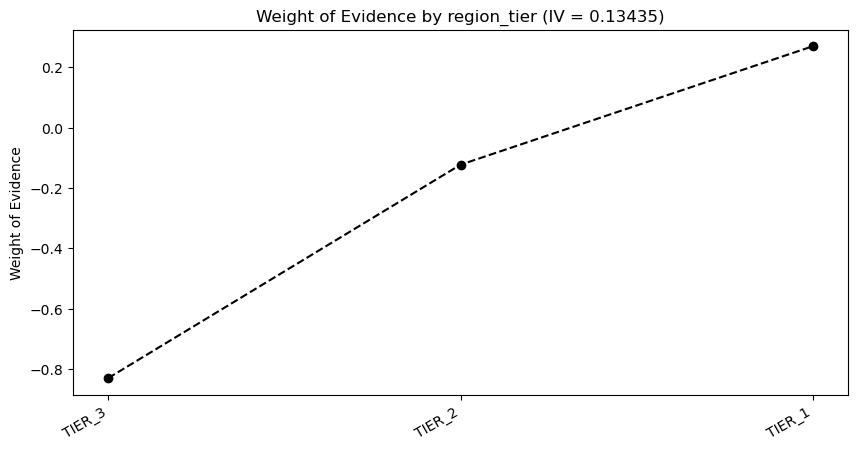

In [47]:
# Sample plot of "total_app_label"
plot_by_woe(woe_discrete(loan_data, 'region_tier'))

## Discretize the continuous

In [48]:
# Continuous columns
columns_num = loan_data.select_dtypes(['float', 'int']).columns

In [49]:
def woe_continuous_best_class_count(df_input, variable_name, class_count_bounds = [5, 6]):
    candidate_class_counts = list(range(class_count_bounds[0], class_count_bounds[1]))

    # Generate bins for each candidate class count
    candidate_bins = [pd.qcut(df_input[variable_name], q=count, duplicates='drop', retbins=True) 
                      for count in candidate_class_counts]

    # Calculate WoE and IV for each binning scheme
    IV_adjusted_list = [woe_discrete(pd.DataFrame({variable_name: bins[0], 'BAD': df_input['BAD']}), variable_name)['IV_adjusted'][0] 
                        for bins in candidate_bins]

    # Find best class count
    best_cut = candidate_class_counts[IV_adjusted_list.index(max(IV_adjusted_list))]

    return [best_cut, woe_discrete(pd.DataFrame({variable_name: candidate_bins[best_cut-class_count_bounds[0]][0], 'BAD': df_input['BAD']}), variable_name), candidate_bins[best_cut-class_count_bounds[0]][1]]

In [50]:
# Manipulation with continuous variables
pd.options.display.max_rows = None
continuous_cols = [col for col in columns_num if col not in ['BAD']]

df_continuous = pd.DataFrame(continuous_cols).rename(columns = {0:'CONTINUOUS_COL'})
df_continuous['BEST_CUT'], df_continuous['IV'], df_continuous['IV_ADJUSTED'], df_continuous['BINS'] = '', '', '', ''
for i in range(len(df_continuous)):
    col = df_continuous['CONTINUOUS_COL'][i]
    if loan_data[col].max() < 1:
        loan_data[col] = loan_data[col] * 100
    results = woe_continuous_best_class_count(loan_data, col)
    df_continuous.at[i, 'BEST_CUT'] = results[0]
    df_continuous.at[i, 'IV'] = results[1]['IV'][0]
    df_continuous.at[i, 'IV_ADJUSTED'] = results[1]['IV_adjusted'][0]
    df_continuous.at[i, 'BINS'] = results[2]
    print(col, 'done!')

df_continuous = df_continuous.sort_values(['IV_ADJUSTED', 'IV', 'BEST_CUT'], ascending = [False, True, True]).reset_index(drop = True)
# Display the top 100 rows with the highest IV scores
df_continuous

stable_and_self_employed_rate_cnt_3d done!
stable_and_self_employed_rate_cnt_7d done!
stable_and_self_employed_rate_cnt_14d done!
stable_and_self_employed_rate_cnt_28d done!
outSideApp_cnt_7d done!
outSideApp_cnt_14d done!
outSideApp_cnt_28d done!
outSideAppPermanent_cnt_7d done!
outSideAppPermanent_cnt_14d done!
outSideAppPermanent_cnt_28d done!
term_permanent_flag_cnt_7d done!
term_permanent_flag_cnt_14d done!
term_permanent_flag_cnt_28d done!
idTrigger_cnt_7d done!
idTrigger_cnt_14d done!
idTrigger_cnt_28d done!
phoneTrigger_cnt_7d done!
phoneTrigger_cnt_14d done!
phoneTrigger_cnt_28d done!
userTriggerNew_cnt_7d done!
userTriggerNew_cnt_14d done!
userTriggerNew_cnt_28d done!
createTimeTrigger_cnt_7d done!
createTimeTrigger_cnt_14d done!
createTimeTrigger_cnt_28d done!
emailTrigger_cnt_7d done!
emailTrigger_cnt_14d done!
emailTrigger_cnt_28d done!
addressTrigger_cnt_7d done!
addressTrigger_cnt_14d done!
addressTrigger_cnt_28d done!
mean_distance_sellOrg7d done!
mean_distance_sellOrg1

,CONTINUOUS_COL,BEST_CUT,IV,IV_ADJUSTED,BINS
0,cumulative_fpd_rate,5,6.002872,6.002872,"[0.0, 3.225806451612903, 100.0]"
1,cumulative_fpd,5,1.043053,1.043053,"[0.0, 1.0, 34.0]"
2,cumulative_app,5,0.591236,0.591236,"[0.0, 2.0, 7.0, 13.0, 27.0, 253.0]"
3,outSideAppPermanent_cnt_28d,5,0.152429,0.152429,"[0.0, 2.0, 224.0]"
4,male_cnt_28d,5,0.149561,0.149561,"[0.0, 1.0, 2.0, 4.0, 9.0, 160.0]"
5,outSideAppPermanent_cnt_14d,5,0.14647,0.14647,"[0.0, 1.0, 133.0]"
6,male_cnt_14d,5,0.14483,0.14483,"[0.0, 1.0, 2.0, 5.0, 103.0]"
7,outSideAppPermanent_cnt_7d,5,0.144594,0.144594,"[0.0, 1.0, 103.0]"
8,male_cnt_7d,5,0.143358,0.143358,"[0.0, 1.0, 3.0, 63.0]"
9,idcard_rej_cnt_28d,5,0.128789,0.128789,"[0.0, 2.0, 3.0, 7.0, 14.0, 189.0]"


cumulative_app binned!
outSideAppPermanent_cnt_28d binned!
male_cnt_28d binned!
outSideAppPermanent_cnt_14d binned!
male_cnt_14d binned!
outSideAppPermanent_cnt_7d binned!
male_cnt_7d binned!


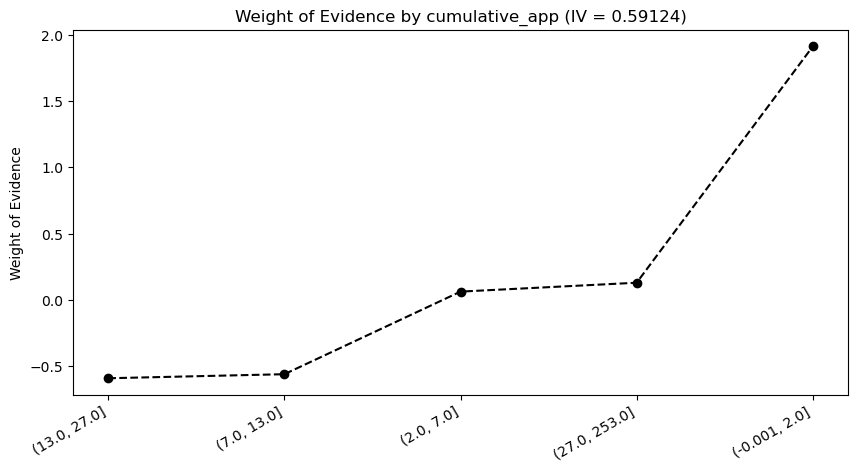

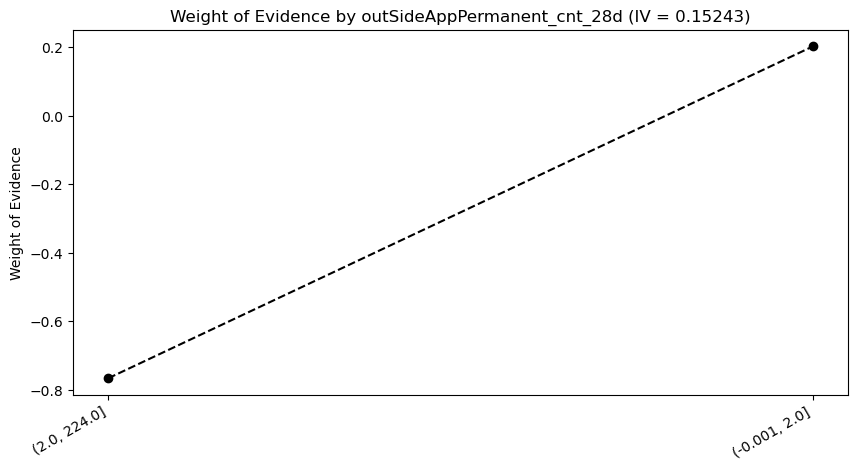

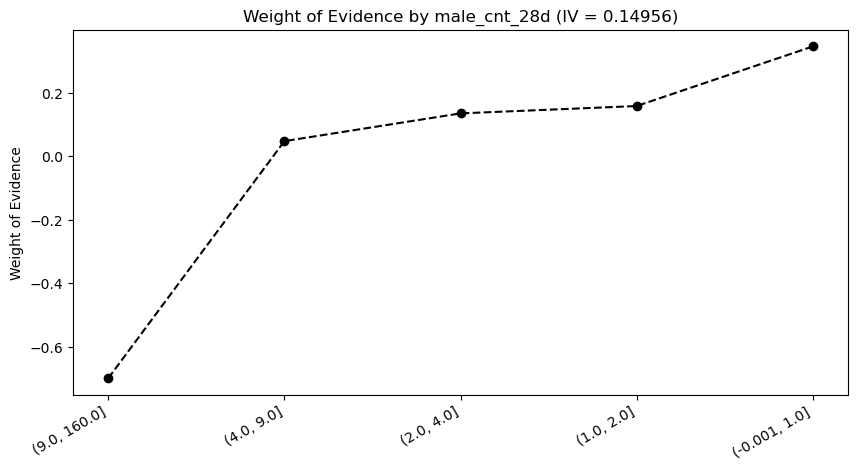

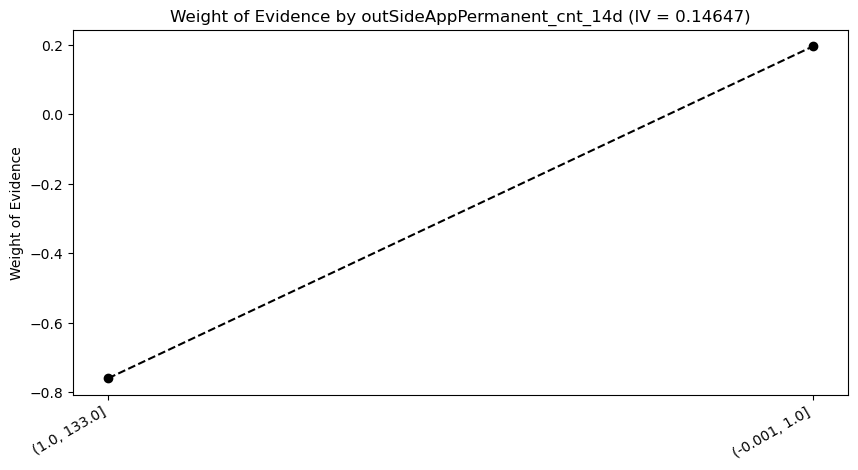

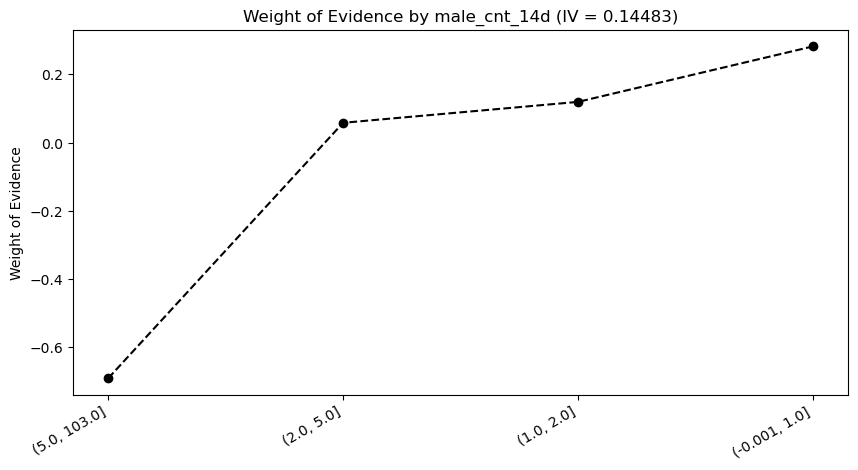

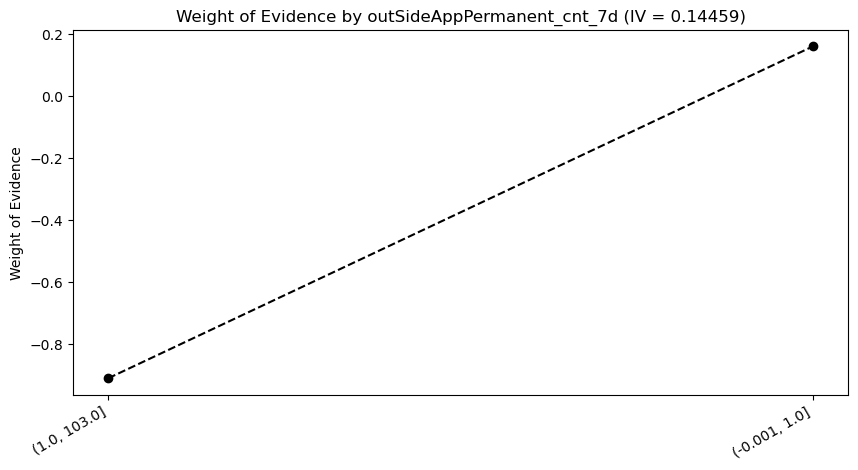

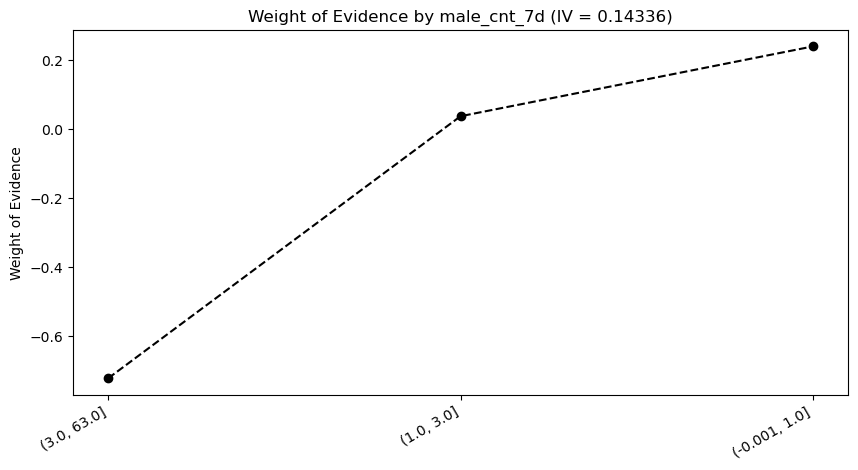

In [51]:
df_continuous_IV_gt_02 = df_continuous[(df_continuous['IV_ADJUSTED'] > 0.14) & (df_continuous['IV_ADJUSTED'] < 1)]

for i in range(len(df_continuous_IV_gt_02)):
    col = df_continuous_IV_gt_02.iloc[i]['CONTINUOUS_COL']
    bins = df_continuous_IV_gt_02.iloc[i]['BINS']
    loan_data[col + '_bin'] = pd.cut(loan_data[col], bins)
    print(col, 'binned!')

for col in df_continuous_IV_gt_02['CONTINUOUS_COL']:
    results = woe_continuous_best_class_count(loan_data, col)
    woe_results = results[1]
    plot_by_woe(woe_results)

In [52]:
# # List of columns you're interested in
# interested_cols = ['outSideAppPermanent_cnt_28d', 'male_cnt_28d', 'Single_cnt_28d', 
#                    'denied_cnt_28d', 'refphone_cnt_28d', 'app_cnt_28d','nonViettel_cnt_28d']

In [53]:
# # List of columns you're interested in
# interested_cols = ['male_cnt_28d', 'idcard_cnt_28d', 'refphone_cnt_28d', 'app_cnt_28d', 
#                    'idcard_rej_cnt_28d', 'denied_cnt_28d', 'Single_cnt_28d', 
#                    'outSideAppPermanent_cnt_28d', 'stable_and_self_employed_rate_cnt_28d', 
#                    'nonViettel_cnt_28d','term_permanent_flag_cnt_21d']

In [54]:
# import pandas as pd
# from sklearn.preprocessing import PolynomialFeatures
# import sklearn

# # Create polynomial features
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# poly_features = poly.fit_transform(loan_data[interested_cols])

# # Check sklearn version for compatibility
# if sklearn.__version__ >= '0.22':
#     feature_names = poly.get_feature_names_out(input_features=interested_cols)
# else:
#     feature_names = poly.get_feature_names(input_features=interested_cols)

# poly_features_df = pd.DataFrame(poly_features, columns=feature_names)

# # Concatenate the polynomial features to your loan_data dataframe
# loan_data_extended = pd.concat([loan_data, poly_features_df], axis=1)

# # Now loop through each of the new polynomial features to calculate WoE and IV
# df_polynomial_iv = pd.DataFrame(poly_features_df.columns).rename(columns={0: 'POLYNOMIAL_FEATURE'})
# df_polynomial_iv['IV'], df_polynomial_iv['IV_ADJUSTED'], df_polynomial_iv['BINS'] = '', '', ''

# for feature in poly_features_df.columns:
#     # Calculate WoE and IV using your existing function, make sure to handle any errors or issues with constant columns
#     try:
#         woe_iv_df = woe_continuous_best_class_count(loan_data_extended, feature)
#         df_polynomial_iv.loc[df_polynomial_iv['POLYNOMIAL_FEATURE'] == feature, 'IV'] = woe_iv_df[1]['IV'][0]
#         df_polynomial_iv.loc[df_polynomial_iv['POLYNOMIAL_FEATURE'] == feature, 'IV_ADJUSTED'] = woe_iv_df[1]['IV_adjusted'][0]
#         df_polynomial_iv.loc[df_polynomial_iv['POLYNOMIAL_FEATURE'] == feature, 'BINS'] = woe_iv_df[2]
#     except ValueError as e:
#         print(f"Error with feature {feature}: {e}")

# # Sort the features based on adjusted IV to find the most predictive new features
# df_polynomial_iv_sorted = df_polynomial_iv.sort_values(['IV_ADJUSTED', 'IV'], ascending=[False, True]).reset_index(drop=True)

# # Display the top rows with the highest IV scores
# df_polynomial_iv_sorted.head(100)


In [55]:
# loan_data_extended.head()

In [56]:
# # It seems you want to filter your DataFrame to specific rows, not columns. 
# # We assume you want to keep rows where 'CONTINUOUS_COL' is in your list of interests.
# df_continuous_IV_gt_02 = df_continuous[df_continuous['CONTINUOUS_COL'].isin(interested_cols)]

# # Now, you're binning each selected continuous variable and adding it as a new column in loan_data
# for i in range(len(df_continuous_IV_gt_02)):
#     col = df_continuous_IV_gt_02.iloc[i]['CONTINUOUS_COL']
#     bins = df_continuous_IV_gt_02.iloc[i]['BINS']
    
#     # Create a new binned column in the loan_data DataFrame
#     loan_data[col + '_bin'] = pd.cut(loan_data[col], bins)
#     print(f"{col} binned!")  # Using f-strings for better readability

# # For each column, you're now recalculating WoE and plotting it
# for col in df_continuous_IV_gt_02['CONTINUOUS_COL']:
#     # Since you're recalculating WoE, it seems unnecessary because you already have this information from earlier.
#     # However, if it's intentional (maybe your data has updated), you can proceed as follows.
#     results = woe_continuous_best_class_count(loan_data, col)
#     woe_results = results[1]  # I'm assuming this is a DataFrame with WoE values
    
#     # Now, you want to plot the WoE values. I assume plot_by_woe is a predefined function that accepts a DataFrame.
#     plot_by_woe(woe_results)

In [57]:
selected_continuous_cols1 = df_continuous_IV_gt_02['CONTINUOUS_COL'].tolist()
selected_continuous_cols1 = [x + '_bin' for x in selected_continuous_cols1]
selected_continuous_cols1

['cumulative_app_bin',
 'outSideAppPermanent_cnt_28d_bin',
 'male_cnt_28d_bin',
 'outSideAppPermanent_cnt_14d_bin',
 'male_cnt_14d_bin',
 'outSideAppPermanent_cnt_7d_bin',
 'male_cnt_7d_bin']

# EDA

In [58]:
discrete_cols = selected_continuous_cols1

# Fill missing values for numerical columns with 0 and object columns with 'NaN'
loan_data.select_dtypes(['float', 'int']).fillna(0, inplace=True)
loan_data.select_dtypes(['object']).fillna('NaN', inplace=True)

# Apply WoE transformation for discrete columns
for col in discrete_cols:
    results = woe_discrete(loan_data, col)
    col_woe = col + '_WOE'
    loan_data[col_woe] = loan_data[col].map(results.set_index(col)['WoE'])

# Convert category columns to object type
category_columns = loan_data.select_dtypes(include='category').columns
loan_data[category_columns] = loan_data[category_columns].astype('object')

# Extract the WoE columns and target variable
X = loan_data.filter(like='_WOE', axis=1).fillna(0)
y = loan_data['BAD']

# Split the data into training and test sets
ids = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(
    X, y, ids, test_size=0.2, stratify=y, shuffle=True, random_state=19
)

# Print shapes for verification
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (81339, 7)
X_test shape:  (20335, 7)
y_train shape:  (81339,)
y_test shape:  (20335,)


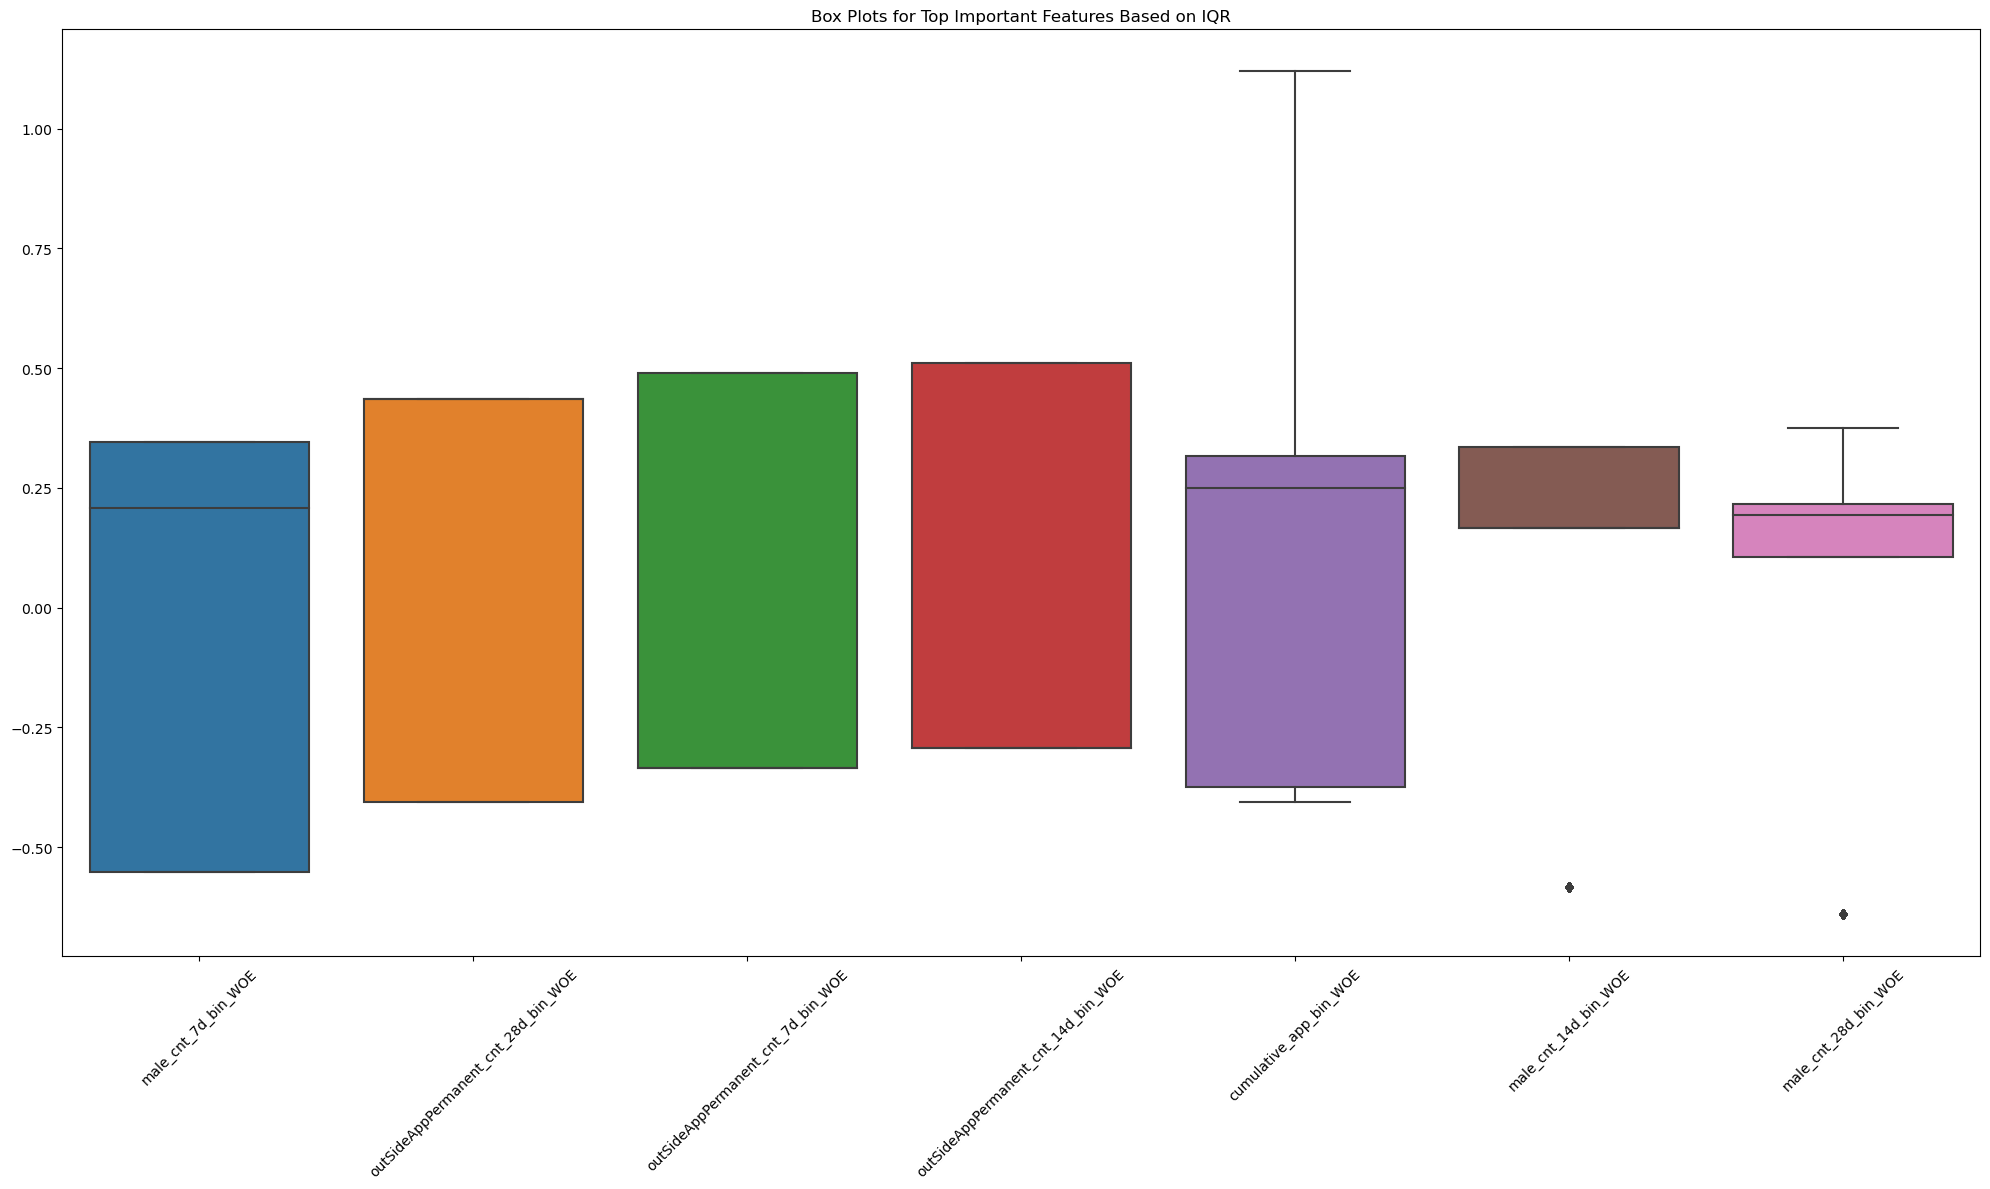

IQR for male_cnt_7d_bin_WOE: 0.8972847126080004
IQR for outSideAppPermanent_cnt_28d_bin_WOE: 0.8406373100160325
IQR for outSideAppPermanent_cnt_7d_bin_WOE: 0.8243196895572535
IQR for outSideAppPermanent_cnt_14d_bin_WOE: 0.8024385732045289
IQR for cumulative_app_bin_WOE: 0.6909147632690638
IQR for male_cnt_14d_bin_WOE: 0.16847841429530677
IQR for male_cnt_28d_bin_WOE: 0.11047635750972615


In [59]:
# List of important features
ref = loan_data.filter(like='_WOE', axis=1).fillna(0)
# Get the final list of columns by excluding the specified columns
important_features = ref.columns


# Calculate IQR for all numeric features
iqr_data = {}
for feature in important_features:
    Q1 = loan_data[feature].quantile(0.25)
    Q3 = loan_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    iqr_data[feature] = IQR

# Sort features by IQR
sorted_features = sorted(iqr_data, key=iqr_data.get, reverse=True)

# Take the top N features based on IQR
top_features = sorted_features[:20]  # Taking top 20. Adjust as needed.

# Replace values of the first feature that are above the 99th percentile and below the 1st percentile
first_feature = top_features[0]
upper_bound = loan_data[first_feature].quantile(0.99)
lower_bound = loan_data[first_feature].quantile(0.01)

loan_data[first_feature] = np.where(loan_data[first_feature] > upper_bound, upper_bound, loan_data[first_feature])
loan_data[first_feature] = np.where(loan_data[first_feature] < lower_bound, lower_bound, loan_data[first_feature])

# Plot the boxplots for top features
plt.figure(figsize=(20, 12))
sns.boxplot(data=loan_data[top_features], order=top_features)
plt.xticks(rotation=45)
plt.title('Box Plots for Top Important Features Based on IQR')
plt.tight_layout()
plt.show()

# Print IQR for top features
for feature in top_features:
    print(f"IQR for {feature}: {iqr_data[feature]}")

In [60]:
# # L1 Regularization
# lasso_reg = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
# lasso_reg.fit(X_train, y_train)

# # L2 Regularization
# ridge_reg = LogisticRegression(penalty='l2', solver='saga', max_iter=10000)
# ridge_reg.fit(X_train, y_train)

In [61]:
# bagging_lasso = BaggingClassifier(base_estimator=lasso_reg, n_estimators=50, random_state=42)
# bagging_lasso.fit(X_train, y_train)

# bagging_ridge = BaggingClassifier(base_estimator=ridge_reg, n_estimators=50, random_state=42)
# bagging_ridge.fit(X_train, y_train)

In [62]:
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

In [63]:
# import xgboost as xgb

# gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
# gbm.fit(X_train, y_train)

# ada = AdaBoostClassifier(n_estimators=100, random_state=42)
# ada.fit(X_train, y_train)

# xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
# xgb_model.fit(X_train, y_train)


In [64]:
# # T-SNE Implementation
# t0 = time.time()
# X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("T-SNE took {:.2} s".format(t1 - t0))

# # PCA Implementation
# t0 = time.time()
# X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("PCA took {:.2} s".format(t1 - t0))

# # TruncatedSVD
# t0 = time.time()
# X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
# t1 = time.time()
# print("Truncated SVD took {:.2} s".format(t1 - t0))

In [65]:
# import matplotlib.patches as mpatches

# f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
# f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

# blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
# red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap='coolwarm', linewidths=2)
# ax1.set_title('t-SNE', fontsize=14)
# ax1.grid(True)
# ax1.legend(handles=[blue_patch, red_patch])

# # PCA scatter plot
# ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=y, cmap='coolwarm', linewidths=2)
# ax2.set_title('PCA', fontsize=14)
# ax2.grid(True)
# ax2.legend(handles=[blue_patch, red_patch])

# # TruncatedSVD scatter plot
# ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=y, cmap='coolwarm', linewidths=2)
# ax3.set_title('Truncated SVD', fontsize=14)
# ax3.grid(True)
# ax3.legend(handles=[blue_patch, red_patch])

# plt.show()

# Split train/val/dev/test

In [66]:
# # Drop index:
# dataset = data
# X.reset_index(drop = True, inplace = True)
# y.reset_index(drop = True, inplace = True)
# data.reset_index(drop = True, inplace = True)

In [67]:
# # Get a list of all column names
# all_columns = df_1.columns.tolist()

# # Columns to exclude
# exclude_columns = ["vnpostUserName", "BAD"]

# # Get the final list of columns by excluding the specified columns
# model_features = [col for col in all_columns if col not in exclude_columns]

In [68]:
# X = df_1[model_features]
# y = df_1['BAD']

In [69]:
# # # Assuming 'dataset' is your DataFrame and 'y' is your target variable column
# # X = dataset.drop('y', axis=1)  # Replace 'y' with the actual name of your target column
# # y = dataset['y']  # Assuming 'y' is your target variable

# # Separate positive and negative samples
# X_pos = X[y == 1]
# X_neg = X[y == 0]
# y_pos = y[y == 1]
# y_neg = y[y == 0]

# # Set your desired test size and random state
# test_size = 0.3
# random_state = 19

# # Split the data for positive and negative samples
# X_temp_pos, X_test_pos, y_temp_pos, y_test_pos = train_test_split(
#     X_pos, y_pos, test_size=test_size, random_state=random_state, stratify=y_pos)
# X_temp_neg, X_test_neg, y_temp_neg, y_test_neg = train_test_split(
#     X_neg, y_neg, test_size=test_size, random_state=random_state, stratify=y_neg)

# # Further split the remaining data into validation and development sets
# val_dev_size = 0.5  # Represents 50% of the remaining 30% data

# X_val_pos, X_dev_pos, y_val_pos, y_dev_pos = train_test_split(
#     X_temp_pos, y_temp_pos, test_size=val_dev_size, random_state=random_state, stratify=y_temp_pos)
# X_val_neg, X_dev_neg, y_val_neg, y_dev_neg = train_test_split(
#     X_temp_neg, y_temp_neg, test_size=val_dev_size, random_state=random_state, stratify=y_temp_neg)

# # Combine positive and negative samples for final datasets
# X_train, y_train = pd.concat([X_temp_pos, X_temp_neg]), pd.concat([y_temp_pos, y_temp_neg])
# X_val, y_val = pd.concat([X_val_pos, X_val_neg]), pd.concat([y_val_pos, y_val_neg])
# X_dev, y_dev = pd.concat([X_dev_pos, X_dev_neg]), pd.concat([y_dev_pos, y_dev_neg])
# X_test, y_test = pd.concat([X_test_pos, X_test_neg]), pd.concat([y_test_pos, y_test_neg])

# # Combine X and y into single dataframes
# data_train = pd.concat([X_train, y_train], axis=1)
# data_val = pd.concat([X_val, y_val], axis=1)
# data_dev = pd.concat([X_dev, y_dev], axis=1)
# data_test = pd.concat([X_test, y_test], axis=1)

# # Print the shape of the datasets
# print('data train shape:', data_train.shape)
# print('data val shape:', data_val.shape)
# print('data dev shape:', data_dev.shape)
# print('data test shape:', data_test.shape)

## Deal with imbalance data

In [70]:
# from sklearn.calibration import calibration_curve, CalibratedClassifierCV

# model1 = RandomForestClassifier(n_estimators=100,
#                                 max_depth=5,
#                                 min_samples_split=200,
#                                 class_weight=None,
#                                 max_features=10)

# model2 = RandomForestClassifier(n_estimators=500, 
#                                 max_depth=10, 
#                                 min_samples_split=400, 
#                                 random_state=19, 
#                                 class_weight="balanced",
#                                 max_features="auto")

# model3 = RandomForestClassifier(n_estimators=800, 
#                                 max_depth=10, 
#                                 min_samples_split=200, 
#                                 random_state=19, 
#                                 class_weight="balanced",
#                                 max_features="sqrt")

# def _tunning_model(model , X_train, y_train, X_dev, y_dev):
#   model.fit(X_train, y_train)
#   model_predictions = model.predict_proba(X_dev)
#   model_roc_score = roc_auc_score(y_dev, 
#                                   model_predictions[:,1])
#   return model, model_roc_score

# model1, model1_roc_score = _tunning_model(model1, 
#                                           data_train[model_features], data_train['BAD'],
#                                           data_dev[model_features], data_dev['BAD'])
# print('model 1 ROC score on dev dataset: ', model1_roc_score)


# model2, model2_roc_score = _tunning_model(model2, 
#                                           data_train[model_features], data_train['BAD'],
#                                           data_dev[model_features], data_dev['BAD'])
# print('model 2 ROC score on dev dataset: ', model2_roc_score)

# model3, model3_roc_score = _tunning_model(model3, 
#                                           data_train[model_features], data_train['BAD'],
#                                           data_dev[model_features], data_dev['BAD'])
# print('model 3 ROC score on dev dataset: ', model3_roc_score)

-> Use model 3 baseline an parameters of it 

## Under Sample

In [71]:
# # Define the function to under-sample and prepare data
# def under_sample_data(X_train, y_train, ratio, random_state=19):
#     # 'ratio' is expected to be a dictionary like {0: 100, 1: 25} for a 4:1 ratio in a binary classification
#     rus = RandomUnderSampler(sampling_strategy=ratio, random_state=random_state)
    
#     # Fit and apply the transform
#     X_train_us, y_train_us = rus.fit_resample(X_train, y_train)

#     # Create a DataFrame from the resampled data
#     data_train_us = pd.concat([pd.DataFrame(X_train_us, columns=X.columns), pd.DataFrame(y_train_us, columns=['BAD'])], axis=1)
    
#     return data_train_us

# # Calculate the number of instances you want for the majority class based on your desired ratio.
# # Assuming class '1' is the minority class, and '0' is the majority class.
# count_class_1 = sum(y_train == 1)
# count_class_1

In [72]:
# # For 80:20 ratio
# ratio_80_20 = {0: int(count_class_1 * 4), 1: count_class_1}  # Because 80:20 is like 4:1
# data_train_us_80_20 = under_sample_data(X_train, y_train, ratio_80_20)

# # For 70:30 ratio
# ratio_70_30 = {0: int(count_class_1 * (7 / 3)), 1: count_class_1}  # Because 70:30 is like 7:3
# data_train_us_70_30 = under_sample_data(X_train, y_train, ratio_70_30)

In [73]:
# # Huấn luyện mô hình trên mẫu tỷ lệ 80:20
# model3_unsam_80_20 = RandomForestClassifier(n_estimators=800, 
#                                 max_depth=10, 
#                                 min_samples_split=200, 
#                                 random_state=19, 
#                                 class_weight="balanced",
#                                 max_features="sqrt")

# model3_unsam_80_20.fit(data_train_us_80_20[model_features], data_train_us_80_20['BAD'])
# model_predictions = model3_unsam_80_20.predict_proba(data_test[model_features])
# model_pred_label = model3_unsam_80_20.predict(data_test[model_features]) 
# model_roc_score = roc_auc_score(data_test['BAD'], model_predictions[:,1])
# model_f1_score = f1_score(data_test['BAD'], model_pred_label)
# print('model3_unsam_80_20 roc score on test: ', model_roc_score)
# print('model3_unsam_80_20 f1 score on test: ', model_f1_score)

# # Huấn luyện mô hình trên mẫu tỷ lệ 70:30
# model3_unsam_70_30 = RandomForestClassifier(n_estimators=800, 
#                                 max_depth=10, 
#                                 min_samples_split=200, 
#                                 random_state=19, 
#                                 class_weight="balanced",
#                                 max_features="sqrt")

# model3_unsam_70_30.fit(data_train_us_70_30[model_features], data_train_us_70_30['BAD'])
# model_predictions = model3_unsam_70_30.predict_proba(data_test[model_features])
# model_pred_label = model3_unsam_70_30.predict(data_test[model_features]) 
# model_roc_score = roc_auc_score(data_test['BAD'], model_predictions[:,1])
# model_f1_score = f1_score(data_test['BAD'], model_pred_label)
# print('model3_unsam_70_30 roc score on test: ', model_roc_score)
# print('model3_unsam_70_30 f1 score on test: ', model_f1_score)

In [74]:
# model_predictions = model3.predict_proba(data_test[model_features])
# model_pred_label = model3.predict(data_test[model_features]) 
# model_roc_score = roc_auc_score(data_test['BAD'], model_predictions[:,1])
# model_f1_score = f1_score(data_test['BAD'], model_pred_label)
# print('random forest roc score on test: ', model_roc_score)
# print('random forest f1 score on test: ', model_f1_score)

## Over sampling

In [75]:
# from collections import Counter

# from sklearn.datasets import make_classification
# from sklearn.svm import LinearSVC

# from imblearn.pipeline import make_pipeline
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.base import BaseSampler

In [76]:
# model_smote = RandomForestClassifier(n_estimators=800, 
#                                 max_depth=10, 
#                                 min_samples_split=200, 
#                                 random_state=19, 
#                                 class_weight="balanced",
#                                 max_features="sqrt")

# pipe = make_pipeline(RandomOverSampler(sampling_strategy=1, random_state=0), model_smote)
# pipe.fit(data_train[model_features], data_train['BAD'])

In [77]:
# # Create a pipeline with a RandomOverSampler and RandomForestClassifier
# pipeline = Pipeline([
#     ('randomoversampler', RandomOverSampler(random_state=0, sampling_strategy=1.0)),  # 'sampling_strategy' is used instead of 'ratio'
#     ('randomforestclassifier', RandomForestClassifier(
#         bootstrap=True, 
#         ccp_alpha=0.0,
#         class_weight='balanced',
#         criterion='gini', 
#         max_depth=10,
#         max_features='sqrt',
#         min_samples_split=200,
#         n_estimators=800, 
#         random_state=12
#     ))
# ], verbose=False)

In [78]:
# model_smote_predictions = pipe.predict_proba(data_test[model_features])
# model_smote_pred_label = pipe.predict(data_test[model_features]) 
# model_smote_roc_score = roc_auc_score(data_test['BAD'], model_smote_predictions[:,1])
# model_smote_f1_score = f1_score(data_test['BAD'], model_smote_pred_label)
# print('random forest roc score on test: ', model_smote_roc_score)
# print('random forest f1 score on test: ', model_smote_f1_score)

In [79]:
# model_predictions = model3.predict_proba(data_test[model_features])
# model_pred_label = model3.predict(data_test[model_features]) 
# model_roc_score = roc_auc_score(data_test['BAD'], model_predictions[:,1])
# model_f1_score = f1_score(data_test['BAD'], model_pred_label)
# print('random forest roc score on test: ', model_roc_score)
# print('random forest f1 score on test: ', model_f1_score)

In [80]:
# # Now, you calculate additional metrics after making predictions.
# accuracy = accuracy_score(data_test['BAD'], model_smote_pred_label)
# precision = precision_score(data_test['BAD'], model_smote_pred_label)
# recall = recall_score(data_test['BAD'], model_smote_pred_label)

# # And then print these metrics along with your previous ones.
# print('random forest roc score on test: ', model_smote_roc_score)
# print('random forest f1 score on test: ', model_smote_f1_score)
# print('Accuracy: ', accuracy)
# print('Precision: ', precision)
# print('Recall: ', recall)

## SMOTE & ADASYN

In [81]:
# from imblearn.over_sampling import ADASYN
# from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC)

# # Define your classifier
# rf_clf = RandomForestClassifier(n_estimators=800, 
#                                 max_depth=10, 
#                                 min_samples_split=200, 
#                                 random_state=19, 
#                                 class_weight="balanced",
#                                 max_features="sqrt")

# # Define the samplers
# samplers = [
#     SMOTE(sampling_strategy=1, random_state=0),
#     BorderlineSMOTE(sampling_strategy=1, random_state=0, kind='borderline-1'),
#     SVMSMOTE(sampling_strategy=1, random_state=0),
#     ADASYN(sampling_strategy=1, random_state=0)
# ]

# smotes = {0 : 'SMOTE',
#           1 : 'BorderlineSMOTE',
#           2 : 'SVMSMOTE',
#           3 : 'ADASYN'}

# # Iterate over your samplers
# for i, sampler in enumerate(samplers):
#     # Resample separately
#     X_resampled, y_resampled = sampler.fit_resample(data_train[model_features], data_train['BAD'])
    
#     # Now, fit the model after resampling
#     rf_clf.fit(X_resampled, y_resampled)

#     # Proceed with prediction and scoring
#     rf_predictions = rf_clf.predict_proba(data_test[model_features])
#     rf_pred_label = rf_clf.predict(data_test[model_features])

#     # Calculate metrics
#     accuracy = accuracy_score(data_test['BAD'], rf_pred_label)
#     precision = precision_score(data_test['BAD'], rf_pred_label)
#     recall = recall_score(data_test['BAD'], rf_pred_label)
#     rf_roc_score = roc_auc_score(data_test['BAD'], rf_predictions[:,1])
#     rf_f1_score = f1_score(data_test['BAD'], rf_pred_label)

#     # Print all the metrics
#     print('------------------------------------------------')
#     print('SMOTE method: ', smotes[i])
#     print('Random Forest ROC score on test: ', rf_roc_score)
#     print('Random Forest F1 score on test: ', rf_f1_score)
#     print('Accuracy: ', accuracy)
#     print('Precision: ', precision)
#     print('Recall: ', recall)

## class_weight 

In [82]:
# model_pen = RandomForestClassifier(n_estimators=800, 
#                                 max_depth=10, 
#                                 min_samples_split=200, 
#                                 random_state=19, 
#                                 class_weight={0: 0.1,
#                                               1: 0.9},
#                                 max_features="sqrt")

# model_pen.fit(data_train[model_features], data_train['BAD'])
# model_pen_predictions = model_pen.predict_proba(data_test[model_features])
# model_pen_pred_label = model_pen.predict(data_test[model_features]) 
# model_pen_roc_score = roc_auc_score(data_test['BAD'], model_pen_predictions[:,1])
# model_pen_f1_score = f1_score(data_test['BAD'], model_pen_pred_label)
# print('Random forest roc score on test: ', model_pen_roc_score)
# print('Random forest f1 score on test: ', model_pen_f1_score)

# Logistic

In [83]:
# log_reg = LogisticRegression(C = 0.0001)

# def _train_and_test(model, algo):
#   model.fit(data_train[model_features], data_train['BAD'])
#   predictions = model.predict_proba(data_test[model_features])
#   pred_label = model.predict(data_test[model_features]) 
#   roc_score = roc_auc_score(data_test['BAD'], predictions[:,1])
#   model_f1_score = f1_score(data_test['BAD'], pred_label)
#   print('{} roc score on test: {}'.format(algo , roc_score))
#   print('{} f1 score on test: {}'.format(algo, model_f1_score))
#   return model

# log_reg = _train_and_test(log_reg, algo = 'Logistic')

# Model Architecture

In [84]:
# import tensorflow as tf
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Dropout

# model = Sequential([
#     Dense(128, activation='relu', input_dim=X_train.shape[1]),
#     Dropout(0.2),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(1)  # no activation for regression
# ])

# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [85]:
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)


In [86]:
# y_pred = model.predict(X_test)
# y_pred_binary = (y_pred > 0.5).astype(int)

In [87]:
# from sklearn.metrics import confusion_matrix, classification_report

# # Assuming y_test are the true labels
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
# print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))


In [88]:
# from sklearn.metrics import roc_curve, roc_auc_score, auc
# import matplotlib.pyplot as plt

# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()


In [89]:
# loss, mae = model.evaluate(X_test, y_test)
# print(f"Mean Absolute Error on Test Data: {mae}")


# MLP

In [90]:
# count = X.shape[1]

In [91]:
# from tensorflow.keras.layers import Dense, Input, Dropout
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

# # # concate nate all layers
# # encode_els = concatenate(encode_els) 
# inputlayer = Input(shape=(X.shape[1],))
# hidden1 = Dense(units = 128, kernel_initializer = 'normal', activation = 'relu')(inputlayer)
# droplayer1 = Dropout(0.8)(hidden1)
# hidden2 = Dense(64, kernel_initializer = 'normal', activation = 'relu')(droplayer1)
# droplayer2 = Dropout(0.2)(hidden2)
# outputlayer = Dense(1, kernel_initializer = 'normal', activation = 'sigmoid')(droplayer2)
# mlp_classifier = Model(inputs = inputlayer, outputs = [outputlayer])
# mlp_classifier.summary()

In [92]:
# optimizer = Adam()
# mlp_classifier.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# mlp_classifier.fit(data_train[model_features], data_train['BAD'],
#                    validation_data = (data_val[model_features], data_val['BAD']),
#                    epochs = 10,
#                    batch_size = 64)

In [93]:
# predictions = mlp_classifier.predict(data_test[model_features])
# pred_label = [0 if prob <= 0.5 else 1 for prob in predictions]
# roc_score = roc_auc_score(data_test['BAD'], predictions)
# model_f1_score = f1_score(data_test['BAD'], pred_label)
# print('{} roc score on test: {}'.format('MLP' , roc_score))
# print('{} f1 score on test: {}'.format('MLP', model_f1_score))

In [94]:
# import lightgbm as lgb

# lgb_classifier = lgb.LGBMClassifier(n_estimator = 800, 
#                                     objective = 'binary', 
#                                     class_weight={0: 0.1,
#                                               1: 0.9},
#                                     learning_rate = 0.05,
#                                     reg_alpha = 0.1,
#                                     reg_lambda = 0.1,
#                                     subsample = 0.8,
#                                     n_job = -1,
#                                     random_state = 12
#                                    )

# lgb_classifier = _train_and_test(lgb_classifier, algo = 'Light Gradient Boosting')


In [95]:
# optimizer = Adam()
# mlp_classifier.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# mlp_classifier.fit(data_train_us_80_20[model_features], data_train_us_80_20['BAD'],
#                    validation_data = (data_val[model_features], data_val['BAD']),
#                    epochs = 10,
#                    batch_size = 64)

In [96]:
# predictions = mlp_classifier.predict(data_test[model_features])
# pred_label = [0 if prob <= 0.5 else 1 for prob in predictions]
# roc_score = roc_auc_score(data_test['BAD'], predictions)
# model_f1_score = f1_score(data_test['BAD'], pred_label)
# print('{} roc score on test: {}'.format('MLP' , roc_score))
# print('{} f1 score on test: {}'.format('MLP', model_f1_score))

In [97]:
# import lightgbm as lgb

# lgb_classifier = lgb.LGBMClassifier(n_estimator = 800, 
#                                     objective = 'binary', 
#                                     class_weight={0: 0.1,
#                                               1: 0.9},
#                                     learning_rate = 0.05,
#                                     reg_alpha = 0.1,
#                                     reg_lambda = 0.1,
#                                     subsample = 0.8,
#                                     n_job = -1,
#                                     random_state = 12
#                                    )

# lgb_classifier = _train_and_test(lgb_classifier, algo = 'Light Gradient Boosting')


# Old versions of Lg

## Random Undersample

In [98]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter
from sklearn.metrics import precision_score,recall_score,f1_score

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# log_reg = LogisticRegression()  # Initialize a Logistic Regression model
undersample_X, undersample_y = rus.fit_resample(X_train, y_train)
# undersample_X, undersample_y = X_train, y_train  # Assuming undersample data comes from your train data

# StratifiedKFold with random_state
sss = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

undersample_X = undersample_X.values
undersample_y = undersample_y.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
nearmiss = NearMiss()

# Set the random state of your Logistic Regression model
log_reg = LogisticRegression(random_state=42)  # Initialize a Logistic Regression model

# ...

# Cross Validating the right way
for train, test in sss.split(undersample_X, undersample_y):
    undersample_pipeline = imbalanced_make_pipeline(nearmiss, log_reg)  # NearMiss happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_X[train], undersample_y[train])
    undersample_prediction = undersample_model.predict(undersample_X[test])
    
    # ... rest of the code remains unchanged

    undersample_accuracy.append(undersample_pipeline.score(undersample_X[test], undersample_y[test]))
    undersample_precision.append(precision_score(undersample_y[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_y[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_y[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_y[test], undersample_prediction))

X_nearmiss, y_nearmiss = nearmiss.fit_resample(undersample_X, undersample_y)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

NearMiss Label Distribution: Counter({0: 12554, 1: 12554})


In [99]:
classifiers = [
    ("Logistic Regression", log_reg)
]

In [100]:
for classifier_name, classifier in classifiers:
    classifier.fit(X_nearmiss, y_nearmiss)
    training_scores = cross_val_score(classifier, X_nearmiss, y_nearmiss, cv=2, scoring='accuracy')
    precision_scores = cross_val_score(classifier, X_nearmiss, y_nearmiss, cv=2, scoring='precision')
    recall_scores = cross_val_score(classifier, X_nearmiss, y_nearmiss, cv=2, scoring='recall')
    
    print(f"Classifier: {classifier_name}")
    print(f"  Accuracy: {round(training_scores.mean() * 100, 2)}%")
    print(f"  Precision: {round(precision_scores.mean() * 100, 2)}%")
    print(f"  Recall: {round(recall_scores.mean() * 100, 2)}%")
    print()


Classifier: Logistic Regression
  Accuracy: 63.43%
  Precision: 62.52%
  Recall: 67.09%



In [101]:
# Apply NearMiss to Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Cross-validator with random_state set
grid_log_reg = GridSearchCV(LogisticRegression(random_state=42), log_reg_params, cv=cv)
grid_log_reg.fit(X_nearmiss, y_nearmiss)
log_reg = grid_log_reg.best_estimator_
print('Best Estimator for Logistic Regression:', log_reg)


Best Estimator for Logistic Regression: LogisticRegression(C=0.1, random_state=42)


In [102]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate evaluation metrics for the undersampling technique
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []

for train, test in sss.split(undersample_X, undersample_y):
    undersample_pipeline = imbalanced_make_pipeline(nearmiss, log_reg)
    undersample_model = undersample_pipeline.fit(undersample_X[train], undersample_y[train])
    undersample_prediction = undersample_model.predict(undersample_X[test])
    
    undersample_accuracy.append(accuracy_score(undersample_y[test], undersample_prediction))
    undersample_precision.append(precision_score(undersample_y[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_y[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_y[test], undersample_prediction))

# Calculate evaluation metrics for overfitting (without undersampling)
y_pred = log_reg.predict(X_train)
overfitting_recall = recall_score(y_train, y_pred)
overfitting_precision = precision_score(y_train, y_pred)
overfitting_f1 = f1_score(y_train, y_pred)
overfitting_accuracy = accuracy_score(y_train, y_pred)

# Create a DataFrame for the results
temp_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Undersampling Technique': [np.mean(undersample_accuracy), np.mean(undersample_precision),
                                 np.mean(undersample_recall), np.mean(undersample_f1)],
    'Overfitting (without Undersampling)': [overfitting_accuracy, overfitting_precision,
                                             overfitting_recall, overfitting_f1]
})

# Print the DataFrame
temp_df


,Metric,Undersampling Technique,Overfitting (without Undersampling)
0,Accuracy,0.638999,0.613285
1,Precision,0.629755,0.236101
2,Recall,0.674843,0.673491
3,F1 Score,0.651486,0.349633


In [103]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, cohen_kappa_score, matthews_corrcoef, precision_recall_curve

# Calculate additional evaluation metrics
auc_roc = roc_auc_score(undersample_y[test], undersample_prediction)
conf_matrix = confusion_matrix(undersample_y[test], undersample_prediction)
class_report = classification_report(undersample_y[test], undersample_prediction)
kappa = cohen_kappa_score(undersample_y[test], undersample_prediction)
mcc = matthews_corrcoef(undersample_y[test], undersample_prediction)
precision, recall, _ = precision_recall_curve(undersample_y[test], undersample_prediction)

# Add the additional metrics to the DataFrame
temp_df['AUC-ROC'] = auc_roc
temp_df['Cohen\'s Kappa'] = kappa
temp_df['Matthews Correlation Coefficient'] = mcc


# Score User

Logistic Regression with Under-Sampling:

In [104]:
# Logistic Regression with Under-Sampling
beta_coeffs_undersample = log_reg.coef_
data_undersample = {'Feature': X.columns, 'Beta Coefficient (Under-Sampling)': beta_coeffs_undersample[0]}
df_undersample = pd.DataFrame(data_undersample)

In [105]:
print("Beta Coefficients (Logistic Regression with Under-Sampling):")
df_undersample

Beta Coefficients (Logistic Regression with Under-Sampling):


,Feature,Beta Coefficient (Under-Sampling)
0,cumulative_app_bin_WOE,-1.078753
1,outSideAppPermanent_cnt_28d_bin_WOE,-0.384600
2,male_cnt_28d_bin_WOE,-0.556414
3,outSideAppPermanent_cnt_14d_bin_WOE,-0.185053
4,male_cnt_14d_bin_WOE,-0.256978
5,outSideAppPermanent_cnt_7d_bin_WOE,-0.300838
6,male_cnt_7d_bin_WOE,-0.373979


In [106]:
intercept  = log_reg.intercept_[0]
intercept

-0.011538510587831247

In [107]:
X_train.columns

Index(['cumulative_app_bin_WOE', 'outSideAppPermanent_cnt_28d_bin_WOE',
       'male_cnt_28d_bin_WOE', 'outSideAppPermanent_cnt_14d_bin_WOE',
       'male_cnt_14d_bin_WOE', 'outSideAppPermanent_cnt_7d_bin_WOE',
       'male_cnt_7d_bin_WOE'],
      dtype='object')

In [108]:
selected_cols = X.columns

In [109]:
# Convert selected columns to string data type
loan_data[selected_cols] = loan_data[selected_cols].astype(str)

# Fill NaN values with the least popular category in each column
for col in selected_cols:
    least_popular = loan_data[col].value_counts().idxmin()  # Get the least popular category
    loan_data[col].fillna(least_popular, inplace=True)

## Sub section

In [110]:
# Store the WoE DataFrames in a dictionary
woe_results = {}

for col in selected_cols:
    # Call woe_discrete function and store the resulting DataFrame in the dictionary
    woe_results[col] = woe_discrete(loan_data, col)

# Extract the coefficients into a dictionary
coeff_dict = df_undersample.set_index('Feature')['Beta Coefficient (Under-Sampling)'].to_dict()

# Debug: Print coeff_dict
print("Coefficients: ", coeff_dict)

# Scaling factor, typically set to PDO (Points to Double the Odds) / log(2)
factor = 20 / np.log(2)
offset = 600  # Example base score, you can choose a different value

# Debug: Print intercept
print("Intercept: ", intercept)

# Building the scorecard
scorecard = pd.DataFrame()

for col in X.columns:
    # Ensure woe_results is a dictionary with DataFrames containing WoE values for each variable
    woe_df = woe_results[col]

    # Debug: Print WoE values
    print(f"WoE values for {col}:")
    print(woe_df['WoE'])
    
    # Calculate score for this variable using WoE and the logistic regression coefficient
    coef = coeff_dict.get(col, 0)

    # Debug: Print coefficient
    print(f"Coefficient for {col}: {coef}")

    scores = woe_df['WoE'] * coef * factor

    # Replace NaN and infinite scores with the mean of the scores
    scores.replace([np.inf, -np.inf], np.nan, inplace=True)
    scores.fillna(scores.mean(), inplace=True)

    # Add the scores to the scorecard
    scorecard[col] = scores

# Sum the scores for each variable and add the intercept and offset to get the final score
scorecard['final_score'] = scorecard.sum(axis=1) + intercept * factor + offset

Coefficients:  {'cumulative_app_bin_WOE': -1.078752839481419, 'outSideAppPermanent_cnt_28d_bin_WOE': -0.3846001140517423, 'male_cnt_28d_bin_WOE': -0.5564141546237752, 'outSideAppPermanent_cnt_14d_bin_WOE': -0.18505328675157764, 'male_cnt_14d_bin_WOE': -0.25697825839564914, 'outSideAppPermanent_cnt_7d_bin_WOE': -0.3008379285529464, 'male_cnt_7d_bin_WOE': -0.37397883175401403}
Intercept:  -0.011538510587831247
WoE values for cumulative_app_bin_WOE:
0   -0.592031
1   -0.561440
2    0.062398
3    0.129475
4    0.932504
5    4.404625
Name: WoE, dtype: float64
Coefficient for cumulative_app_bin_WOE: -1.078752839481419
WoE values for outSideAppPermanent_cnt_28d_bin_WOE:
0   -0.766007
1    0.074630
2    0.241410
Name: WoE, dtype: float64
Coefficient for outSideAppPermanent_cnt_28d_bin_WOE: -0.3846001140517423
WoE values for male_cnt_28d_bin_WOE:
0   -0.698464
1    0.047911
2    0.135306
3    0.158387
4    0.316902
5    0.382176
Name: WoE, dtype: float64
Coefficient for male_cnt_28d_bin_WOE: -0

In [111]:
# Create empty lists to store the data
feature_list = []
bin_list = []
woe_adjusted_list = []

# Iterate over the dictionary items
for feature, df in woe_results.items():
    # Extract the data from the DataFrame
    bins = df.iloc[:, 0].astype(str)  # Assuming the bins are in the second column
    woe = df['WoE']

    # Replace -inf values with a large negative value (e.g., -9999)
    woe = np.where(np.isinf(woe), -9999, woe)

    # Calculate the adjusted WoE
    woe_adjusted = woe * 1.2  # Adjust the WoE calculation as per your requirement

    # Append the data to the lists
    feature_list.extend([feature] * len(bins))
    bin_list.extend(bins)
    woe_adjusted_list.extend(woe_adjusted)

# Create the DataFrame
woe_df = pd.DataFrame({'features': feature_list, 'bins': bin_list, 'WoE_adjusted': woe_adjusted_list})

# Print the resulting DataFrame
woe_df


,features,bins,WoE_adjusted
0,cumulative_app_bin_WOE,-0.405305767565946,-0.710437
1,cumulative_app_bin_WOE,-0.3747147786716066,-0.673728
2,cumulative_app_bin_WOE,0.24912262316523184,0.074877
3,cumulative_app_bin_WOE,0.31619998459745724,0.155370
4,cumulative_app_bin_WOE,1.1192287404058976,1.119004
5,cumulative_app_bin_WOE,nan,5.285550
6,outSideAppPermanent_cnt_28d_bin_WOE,-0.40498847950009736,-0.919209
7,outSideAppPermanent_cnt_28d_bin_WOE,0.4356488305159351,0.089556
8,outSideAppPermanent_cnt_28d_bin_WOE,nan,0.289692
9,male_cnt_28d_bin_WOE,-0.6398172493476094,-0.838157


In [112]:
# Extract the coefficients into a dictionary
coeff_dict = df_undersample.set_index('Feature')['Beta Coefficient (Under-Sampling)'].to_dict()

# Scaling factor, typically set to PDO (Points to Double the Odds) / log(2)
factor = 20 / np.log(2)
offset = 600  # Example base score, you can choose a different value


In [113]:
# Build the initial data for the scorecard
feature_list = []
bin_list = []
woe_list = []
score_list = []

# Iterate over the WoE results
for feature, df in woe_results.items():
    bins = df.iloc[:, 0].astype(str)  # Assuming the bins are in the first column of the DataFrame
    woe = df['WoE']
    coeff = coeff_dict.get(feature)  # Get the coefficient for the current feature from the dictionary
    
    # Calculate scores for each bin
    # Calculate scores for each bin
    scores = ((0 - woe) * coeff * factor)

    
    # Append the data to the lists
    feature_list.extend([feature] * len(bins))
    bin_list.extend(bins)
    woe_list.extend(woe)
    score_list.extend(scores)

# Calculate the base score
base_score = offset - (intercept * factor)

# Create the scorecard DataFrame
scorecard = pd.DataFrame({'Feature': feature_list, 'Bin': bin_list, 'WoE': woe_list, 'Score': score_list})

# Adding the base score as the last row
scorecard = scorecard.append({'Feature': 'Base Score', 'Bin': None, 'WoE': None, 'Score': base_score}, ignore_index=True)

In [114]:
scorecard

,Feature,Bin,WoE,Score
0,cumulative_app_bin_WOE,-0.405305767565946,-0.592031,-18.427688
1,cumulative_app_bin_WOE,-0.3747147786716066,-0.561440,-17.475506
2,cumulative_app_bin_WOE,0.24912262316523184,0.062398,1.942199
3,cumulative_app_bin_WOE,0.31619998459745724,0.129475,4.030064
4,cumulative_app_bin_WOE,1.1192287404058976,0.932504,29.025320
5,cumulative_app_bin_WOE,nan,4.404625,137.099372
6,outSideAppPermanent_cnt_28d_bin_WOE,-0.40498847950009736,-0.766007,-8.500546
7,outSideAppPermanent_cnt_28d_bin_WOE,0.4356488305159351,0.074630,0.828185
8,outSideAppPermanent_cnt_28d_bin_WOE,nan,0.241410,2.678977
9,male_cnt_28d_bin_WOE,-0.6398172493476094,-0.698464,-11.213646


In [115]:
# Assuming your DataFrame is named 'df'
category_columns = loan_data.select_dtypes(include='category')
category_columns = category_columns.columns
# Assuming your DataFrame is named 'df' and the column to convert is 'category_column'
loan_data[category_columns] = loan_data[category_columns].astype('object')

In [116]:
loan_data.head()

,MONTH,loan_date,region_tier,vnpostUserName,stable_and_self_employed_rate_cnt_3d,stable_and_self_employed_rate_cnt_7d,stable_and_self_employed_rate_cnt_14d,stable_and_self_employed_rate_cnt_28d,outSideApp_cnt_7d,outSideApp_cnt_14d,outSideApp_cnt_28d,outSideAppPermanent_cnt_7d,outSideAppPermanent_cnt_14d,outSideAppPermanent_cnt_28d,term_permanent_flag_cnt_7d,term_permanent_flag_cnt_14d,term_permanent_flag_cnt_28d,idTrigger_cnt_7d,idTrigger_cnt_14d,idTrigger_cnt_28d,phoneTrigger_cnt_7d,phoneTrigger_cnt_14d,phoneTrigger_cnt_28d,userTriggerNew_cnt_7d,userTriggerNew_cnt_14d,userTriggerNew_cnt_28d,createTimeTrigger_cnt_7d,createTimeTrigger_cnt_14d,createTimeTrigger_cnt_28d,emailTrigger_cnt_7d,emailTrigger_cnt_14d,emailTrigger_cnt_28d,addressTrigger_cnt_7d,addressTrigger_cnt_14d,addressTrigger_cnt_28d,mean_distance_sellOrg7d,mean_distance_sellOrg14d,mean_distance_sellOrg28d,distance_sellerOrg_locationCreate_km_cnt_7d,distance_sellerOrg_locationCreate_km_cnt_14d,distance_sellerOrg_locationCreate_km_cnt_28d,distance_sellerProvince_locationCreate_km_7d,distance_sellerProvince_locationCreate_km_14d,distance_sellerProvince_locationCreate_km_28d,idcard_rej_cnt_3d,idcard_rej_cnt_7d,idcard_rej_cnt_14d,idcard_rej_cnt_28d,Single_cnt_3d,Single_cnt_7d,Single_cnt_14d,Single_cnt_28d,amt30_cnt_3d,amt30_cnt_7d,amt30_cnt_14d,amt30_cnt_27d,nonViettel_cnt_3d,nonViettel_cnt_7d,nonViettel_cnt_14d,nonViettel_cnt_28d,male_cnt_3d,male_cnt_7d,male_cnt_14d,male_cnt_28d,idcard_cnt_3d,idcard_cnt_7d,idcard_cnt_14d,idcard_cnt_28d,refphone_cnt_3d,refphone_cnt_7d,refphone_cnt_14d,refphone_cnt_28d,app_cnt_1d,app_cnt_3d,app_cnt_7d,app_cnt_14d,app_cnt_28d,app_cnt_60d,velocity_3d,acceleration_3d,velocity_7d,velocity_14d,velocity_28d,velocity_60d,approve_cnt_3d,approve_cnt_7d,approve_cnt_14d,approve_cnt_28d,BAD_lock,acceleration_7d,acceleration_14d,acceleration_28d,acceleration_60d,avg_distance_sellerOrg_locationCreate_km_cnt_7d,avg_distance_sellerOrg_locationCreate_km_cnt_14d,avg_distance_sellerOrg_locationCreate_km_cnt_28d,avg_distance_sellerProvince_locationCreate_km_7d,avg_distance_sellerProvince_locationCreate_km_14d,avg_distance_sellerProvince_locationCreate_km_28d,lock_time,BAD,cumulative_app,cumulative_fpd,cumulative_fpd_rate,day_of_week,stable_and_self_employed_rate_cnt_3d_fine_classing,stable_and_self_employed_rate_cnt_7d_fine_classing,stable_and_self_employed_rate_cnt_14d_fine_classing,stable_and_self_employed_rate_cnt_28d_fine_classing,outSideApp_cnt_7d_fine_classing,outSideApp_cnt_14d_fine_classing,outSideApp_cnt_28d_fine_classing,outSideAppPermanent_cnt_7d_fine_classing,outSideAppPermanent_cnt_14d_fine_classing,outSideAppPermanent_cnt_28d_fine_classing,term_permanent_flag_cnt_7d_fine_classing,term_permanent_flag_cnt_14d_fine_classing,term_permanent_flag_cnt_28d_fine_classing,idTrigger_cnt_7d_fine_classing,idTrigger_cnt_14d_fine_classing,idTrigger_cnt_28d_fine_classing,phoneTrigger_cnt_7d_fine_classing,phoneTrigger_cnt_14d_fine_classing,phoneTrigger_cnt_28d_fine_classing,userTriggerNew_cnt_7d_fine_classing,userTriggerNew_cnt_14d_fine_classing,userTriggerNew_cnt_28d_fine_classing,createTimeTrigger_cnt_7d_fine_classing,createTimeTrigger_cnt_14d_fine_classing,createTimeTrigger_cnt_28d_fine_classing,emailTrigger_cnt_7d_fine_classing,emailTrigger_cnt_14d_fine_classing,emailTrigger_cnt_28d_fine_classing,addressTrigger_cnt_7d_fine_classing,addressTrigger_cnt_14d_fine_classing,addressTrigger_cnt_28d_fine_classing,mean_distance_sellOrg7d_fine_classing,mean_distance_sellOrg14d_fine_classing,mean_distance_sellOrg28d_fine_classing,distance_sellerOrg_locationCreate_km_cnt_7d_fine_classing,distance_sellerOrg_locationCreate_km_cnt_14d_fine_classing,distance_sellerOrg_locationCreate_km_cnt_28d_fine_classing,distance_sellerProvince_locationCreate_km_7d_fine_classing,distance_sellerProvince_locationCreate_km_14d_fine_classing,distance_sellerProvince_locationCreate_km_28d_fine_classing,idcard_rej_cnt_3d_fine_classing,idcard_rej_cnt_7d_fine_classing,idcard_rej_cnt_14d_fine_cla

In [117]:
def preprocess_scorecard(scorecard):
    # Preprocessing the scorecard to handle NaN values and proper binning
    processed_scorecard = []
    for _, score_row in scorecard.iterrows():
        feature = score_row['Feature']
        if feature == 'Base Score':
            continue
        bin_str = str(score_row['Bin'])
        if bin_str == 'nan':
            bin_values = np.nan
        elif '(' in bin_str and ')' in bin_str:
            bin_str = bin_str.replace('(', '').replace(']', '')
            bin_values = tuple(map(float, bin_str.split(',')))
        else:
            bin_values = bin_str
        processed_scorecard.append({'Feature': feature, 'Bin': bin_values, 'Score': score_row['Score']})
    return processed_scorecard

def calculate_individual_score(row, processed_scorecard, base_score):
    score = base_score
    for score_dict in processed_scorecard:
        feature = score_dict['Feature']
        value = row[feature]
        bin_values = score_dict['Bin']
        if isinstance(bin_values, tuple):
            if bin_values[0] < value <= bin_values[1]:
                score += score_dict['Score']
        elif pd.isna(bin_values) and pd.isna(value):
            score += score_dict['Score']
        else:
            if str(value) == bin_values:
                score += score_dict['Score']
    return score

# Preprocessing the scorecard
processed_scorecard = preprocess_scorecard(scorecard)

# Calculate the scores for each observation in loan_data
loan_data['Score'] = loan_data.apply(lambda x: calculate_individual_score(x, processed_scorecard, base_score), axis=1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


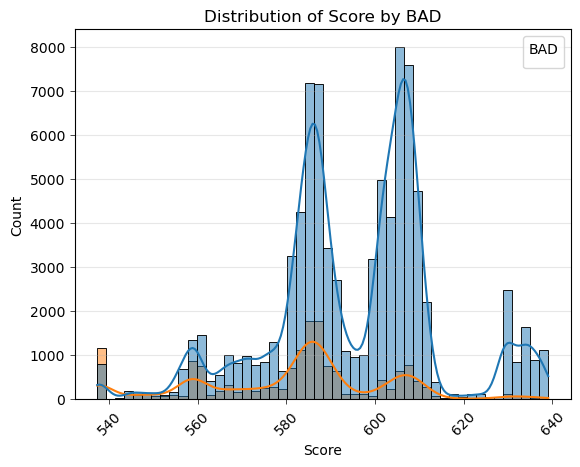

In [118]:
# Assuming you have a DataFrame called 'data' with columns 'score' and 'BAD'
sns.histplot(data=loan_data, x='Score', hue='BAD', kde=True, bins=50)

plt.title('Distribution of Score by BAD')
plt.xlabel('Score')
plt.ylabel('Count')

# Customize legend position and title
plt.legend(title='BAD', loc='upper right')

# Adjust the axis labels and tick marks
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='both', width=0.5)
plt.grid(axis='y', alpha=0.3)

plt.show()

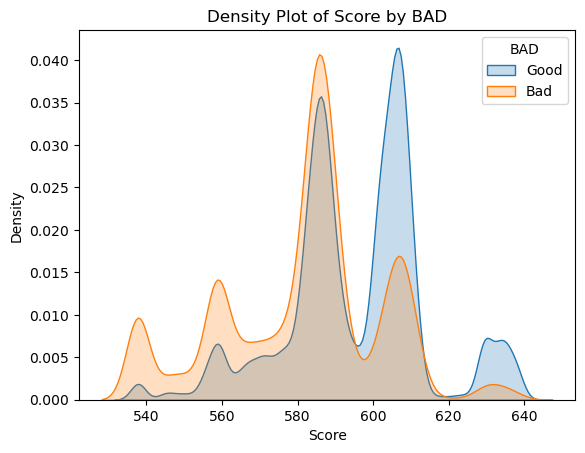

In [119]:
# Assuming you have a DataFrame called 'data' with columns 'Score' and 'BAD'
sns.kdeplot(data=data[data['BAD'] == 0], x='Score', fill=True, label='Good')
sns.kdeplot(data=data[data['BAD'] == 1], x='Score', fill=True, label='Bad')

plt.title('Density Plot of Score by BAD')
plt.xlabel('Score')
plt.ylabel('Density')

plt.legend(title='BAD')
plt.show()

In [120]:
# Identify columns that contain '_bin'
columns_to_drop = [col for col in loan_data.columns if '_bin' in col]

# Drop these columns
loan_data.drop(columns_to_drop, axis=1, inplace=True)

In [121]:
# loan_data['loan_date'] = pd.to_datetime(loan_data['loan_date']).dt.strftime('%d/%m/%Y')

# loan_data.to_csv('C:\\Users\\lekho\\OneDrive\Máy tính\\fizo-it-team\\Score Ver 4.0\\loan_tier1.csv', index=False)
